## Import libraries

In [240]:
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

## Load dataset

In [123]:
df = pd.read_excel('DATA SET 031721.xlsx', sheet_name=None)

In [2]:
df.keys()

dict_keys(['1', '2', '3'])

In [3]:
# merge all sheets

df2 = pd.concat([df['1'], df['2'], df['3']], ignore_index=True)

In [4]:
df2.shape

(43020, 31)

## Data cleaning and Initial EDA

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43020 entries, 0 to 43019
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           43020 non-null  datetime64[ns]
 1   Mileage In        43020 non-null  int64         
 2   Mileage Out       43020 non-null  int64         
 3   Work Order        43020 non-null  int64         
 4   Year              41182 non-null  float64       
 5   Make              41115 non-null  object        
 6   Model             41028 non-null  object        
 7   Submodel          4504 non-null   object        
 8   Engine            25186 non-null  object        
 9   VIN               36603 non-null  object        
 10  Unit              125 non-null    object        
 11  Color             18146 non-null  object        
 12  Line Type         43020 non-null  object        
 13  Profit Center     43020 non-null  object        
 14  Service Category  4302

In [6]:
# check for null values

df2.isnull().sum()

Created                 0
Mileage In              0
Mileage Out             0
Work Order              0
Year                 1838
Make                 1905
Model                1992
Submodel            38516
Engine              17834
VIN                  6417
Unit                42895
Color               24874
Line Type               0
Profit Center           0
Service Category        0
Code                16809
Service Package         0
Part Number         11939
Description             0
Manufacturer        13552
Definition          25786
Price                   0
Quantity                0
Total                   0
Discount                0
Net Total               0
ContactID               0
ServiceItemID           0
InvoiceID               0
DefinitionID        25786
Line Code           43019
dtype: int64

In [7]:
df2[~df2.Unit.isnull()]

# drop Unit column

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Line Code
5583,2019-05-18 09:38:48,35276,35277,1488,2017.0,TOYOTA,VIOS 1.3E A/T,NaN,1NRX172223,PA1BA9F39H4034930,...,0.00,3.0,0.00,0.0,0.00,1d6902a4-5d0a-4028-9452-9645a4e1c377,b7b019ea-0aea-4f1b-a3b8-1b390fd2cdbf,a89da6c3-7526-4da8-ac64-daf678ba1606,NaN,NaN
5584,2019-05-18 09:38:48,35276,35277,1488,2017.0,TOYOTA,VIOS 1.3E A/T,NaN,1NRX172223,PA1BA9F39H4034930,...,142.87,1.0,142.87,0.0,142.87,1d6902a4-5d0a-4028-9452-9645a4e1c377,b7b019ea-0aea-4f1b-a3b8-1b390fd2cdbf,a89da6c3-7526-4da8-ac64-daf678ba1606,NaN,NaN
5585,2019-05-18 09:38:48,35276,35277,1488,2017.0,TOYOTA,VIOS 1.3E A/T,NaN,1NRX172223,PA1BA9F39H4034930,...,428.58,1.0,428.58,0.0,428.58,1d6902a4-5d0a-4028-9452-9645a4e1c377,b7b019ea-0aea-4f1b-a3b8-1b390fd2cdbf,a89da6c3-7526-4da8-ac64-daf678ba1606,NaN,NaN
5586,2019-05-18 09:38:48,35276,35277,1488,2017.0,TOYOTA,VIOS 1.3E A/T,NaN,1NRX172223,PA1BA9F39H4034930,...,0.00,0.0,1339.29,0.0,1339.29,1d6902a4-5d0a-4028-9452-9645a4e1c377,b7b019ea-0aea-4f1b-a3b8-1b390fd2cdbf,a89da6c3-7526-4da8-ac64-daf678ba1606,NaN,NaN
5587,2019-05-18 09:38:48,35276,35277,1488,2017.0,TOYOTA,VIOS 1.3E A/T,NaN,1NRX172223,PA1BA9F39H4034930,...,0.00,1.0,0.00,0.0,0.00,1d6902a4-5d0a-4028-9452-9645a4e1c377,b7b019ea-0aea-4f1b-a3b8-1b390fd2cdbf,a89da6c3-7526-4da8-ac64-daf678ba1606,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31033,2019-07-11 16:28:00,162283,162283,5018,2003.0,Honda,CRV 2.0L A/T,NaN,PRLD832005016,PADRD48302V005028,...,446.43,1.0,446.43,0.0,446.43,847a9c5b-7e0a-463f-8d80-9cd7b5fbbbb2,b75ec40f-21b7-4789-b949-3b0d32963808,ac1fc38a-bd4b-413f-812d-29557f8b15b3,NaN,NaN
40396,2020-07-03 16:15:22,24264,24264,1072,2017.0,TOYOTA,WIGO,NaN,1KRA353182,MHKA4DF3FGJ021424,...,446.43,1.0,446.43,0.0,446.43,a062dd71-f001-4427-8d63-ae585bb81db2,4481cf67-e641-47ce-b381-aad22373d27a,2788ddbe-fc94-4371-be92-3576b3f9582a,NaN,NaN
40397,2020-07-03 16:15:22,24264,24264,1072,2017.0,TOYOTA,WIGO,NaN,1KRA353182,MHKA4DF3FGJ021424,...,267.86,1.0,267.86,0.0,267.86,a062dd71-f001-4427-8d63-ae585bb81db2,4481cf67-e641-47ce-b381-aad22373d27a,2788ddbe-fc94-4371-be92-3576b3f9582a,NaN,NaN
40398,2020-07-03 16:15:22,24264,24264,1072,2017.0,TOYOTA,WIGO,NaN,1KRA353182,MHKA4DF3FGJ021424,...,294.64,3.0,883.92,0.0,883.92,a062dd71-f001-4427-8d63-ae585bb81db2,4481cf67-e641-47ce-b381-aad22373d27a,2788ddbe-fc94-4371-be92-3576b3f9582a,12138.0,NaN


In [8]:
df2.Code.unique()

# drop Code column

array(['PMS / 30PMI', nan, 'BW', 'WAP', 'VPX-COP', 'COP / OCCI',
       'VPX-ECOS-004-SV1', 'VPX-WAP', 'PMS / CVI', 'VPX-MONT-002-LV1',
       'CWD', 'AC', 'VPX-MIRA-002-MS1', 'Overhaul', 'TIRE', 'VPX-CVI',
       'VPX-MIRA-002-MS2', 'VPX-LANC-002-CS2', 'VPX-EVER-004-LV1',
       'VPX-PICA-008-CS1', 'FLEET', 'VPX-SONI-007-CS2',
       'VPX-VIOS-001-CS1', 'VPX-MONT-002-LV2', 'VPX-MAZ3-010-MS2',
       'VPX-EON-005-CS1', 'SEDAN', 'PACKAGE', 'VPX-FORT-001-LV2',
       'GRAB-COP', 'SPRINT-CITY', 'SPRINT-INNOVA', 'SPRINT-VIOS',
       'SPRINT-FORTUNER', 'SPRINT-MONTERO', 'SPRINT-CSS', 'SPRINT-LSP',
       'SPRINT-MS', 'SPRINT-SSA', 'REMINDER', 'SPRINT-LSW',
       'SPRINT-MAZDA3', 'SPRINT-VC', 'SPRINT-ALTIS', 'PMS', 'COP',
       'VPX-VIOS', 'VPX-EVEREST', 'VPX-DMAX', 'VPX-ALIGNMENT',
       'VPX-FLEET TIRES', 'VPX-ACCENT', 'VPX-MIRAGE', 'VPX-INNOVA',
       'VPX-MITSUBISHI', 'VPX-CX5', 'VPX-HONDA', 'VPX-FIESTA',
       'VPX-ADVE-002-SV1', 'VPX-CITY-003-CS1', 'VPX-ACCE-005-CS1',
       'VPX

In [9]:
df2.Submodel.unique()

# drop Submodel column

array([nan, '2.5', '1.3J - MT/GAS', 'NV350 - MT/DIESEL', 'GASOLINE', 'AT',
       '1.5G - AT/GAS', 'AT/GAS', 'Diesel', '1.2 A/T', 'TYPE Z', '4x2',
       'G4', '1.2G', '2.0G GAS', '4X2', 'GLX', '1.3E', '2.5J DSL',
       '2.8 E DI', 'Altis 1.6V - AT/GAS', 'Titanium - AT/DIESEL', 'Gas',
       '0.8L GL - MT/GAS', 'Sport GLS', 'CVVT SU - AT/GAS',
       'GLX 1.2G Hatchback - MT/GAS', '2.0 - AT/GAS', 'MT', '2.0 XLT',
       '1.6 CRDI', 'LX - AT/DIESEL', 'GXR', '4X2 - AT/DIESEL',
       'MT/DIESEL', 'CXR 4.5 - AT', 'MT/GAS', 'GAS', 'GLX 2 - MT/DIESEL',
       '4.4L - AT/DIESEL', 'CVVT 1.6', 'G4 GLS - AT/GAS', '2.4L 4X2',
       'Unleaded', '2.8', 'SS 2.0', '2.4L 4X2 - DIESEL', '1.6L - MT/GAS',
       '2.8 - AT', 'AT/DIESEL', 'Trend 2 - DIESEL', '3.0 A/T',
       'ALUMINUM VAN', '1.6L - GAS', 'GLS', 'THETA II GASOLINE',
       'i-VTEC - MT/GAS', 'DIESEL', 'Altis 1.6G - AT/GAS',
       '1.6G - AT/GAS', '1.5 - AT/GAS', '1.3J', '3.5Q - AT/GAS',
       'FB Exceed', '2.2 XLS - MT/DIESEL', '2.6 -

In [10]:
df2['Profit Center'].unique()

# drop Profit Center column

array(['Automotive Service'], dtype=object)

### Cleaning Mileage

In [11]:
df2['Mileage_diff'] = df2['Mileage Out'] - df2['Mileage In']

In [12]:
df2['Mileage_diff'].sort_values()

35670   -153000
12159   -134994
12140   -134994
12141   -134994
12142   -134994
          ...  
19268    409301
40849    578818
25250    589000
38571    680365
38657    841501
Name: Mileage_diff, Length: 43020, dtype: int64

In [13]:
df2[abs(df2['Mileage_diff']) > 100 ]

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Line Code,Mileage_diff
31,2019-01-02 08:30:25,37942,37043,85,2017.0,TOYOTA,GRANDIA,NaN,NaN,JTFRT13PXG8010941,...,1.1,491.07,0.00,491.07,0132328f-c639-4141-99ee-c4f781031950,0a8dc7e4-d75b-4974-bf2e-d22c54406622,08686dfd-ab1a-4f36-9796-d36bcc4e4952,NaN,NaN,-899
309,2019-01-10 09:30:12,41039,41309,211,2011.0,Hyundai,Grand Starex CVX - AT/DIESEL,NaN,D4CBB829827,KMJWA37JJBBU364335,...,1.0,186.57,0.00,186.57,a65f03cc-62a6-4eae-b07e-0a718d9702e2,989b22e3-6584-4ac0-a2c5-50d95a98be26,d34f6d6b-86dc-42ad-ab43-f5971b79e227,NaN,NaN,270
310,2019-01-10 09:30:12,41039,41309,211,2011.0,Hyundai,Grand Starex CVX - AT/DIESEL,NaN,D4CBB829827,KMJWA37JJBBU364335,...,3.9,1741.08,1741.08,0.00,a65f03cc-62a6-4eae-b07e-0a718d9702e2,989b22e3-6584-4ac0-a2c5-50d95a98be26,d34f6d6b-86dc-42ad-ab43-f5971b79e227,NaN,NaN,270
311,2019-01-10 09:30:12,41039,41309,211,2011.0,Hyundai,Grand Starex CVX - AT/DIESEL,NaN,D4CBB829827,KMJWA37JJBBU364335,...,1.0,970.15,0.00,970.15,a65f03cc-62a6-4eae-b07e-0a718d9702e2,989b22e3-6584-4ac0-a2c5-50d95a98be26,d34f6d6b-86dc-42ad-ab43-f5971b79e227,NaN,NaN,270
312,2019-01-10 09:30:12,41039,41309,211,2011.0,Hyundai,Grand Starex CVX - AT/DIESEL,NaN,D4CBB829827,KMJWA37JJBBU364335,...,7.0,3125.01,0.00,3125.01,a65f03cc-62a6-4eae-b07e-0a718d9702e2,989b22e3-6584-4ac0-a2c5-50d95a98be26,d34f6d6b-86dc-42ad-ab43-f5971b79e227,NaN,NaN,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42446,2021-01-30 12:05:21,63012,63212,2018,2012.0,HONDA,CITY GAS A/T 1.5,NaN,L15A74403397,PADGM2650CV311396,...,2.7,1205.36,0.00,1205.36,bb4e36a9-54ef-483d-8d20-77e2539149a4,8f64914e-d125-4de2-bcf7-001aac5663e9,1e470674-a972-4d63-9695-5dc9aef828b4,NaN,NaN,200
42881,2021-02-13 11:01:12,162245,162425,2093,2010.0,MITSUBISHI,ADVENTURE SS2.,DIESEL,4D56AAC5363,PAEVB5MP99B000031,...,3.0,1339.29,0.00,1339.29,17094436-e5ac-4657-a758-ea8e51635126,42c89a4f-c13d-49f8-a17a-cb04555e1e38,cdbc9e9f-2ad2-4fc9-8ff6-14102bd152c4,NaN,NaN,180
42882,2021-02-13 11:01:12,162245,162425,2093,2010.0,MITSUBISHI,ADVENTURE SS2.,DIESEL,4D56AAC5363,PAEVB5MP99B000031,...,2.0,3000.02,0.00,3000.02,17094436-e5ac-4657-a758-ea8e51635126,42c89a4f-c13d-49f8-a17a-cb04555e1e38,cdbc9e9f-2ad2-4fc9-8ff6-14102bd152c4,1704.0,NaN,180
42883,2021-02-13 11:01:12,162245,162425,2093,2010.0,MITSUBISHI,ADVENTURE SS2.,DIESEL,4D56AAC5363,PAEVB5MP99B000031,...,4.0,178.56,0.00,178.56,17094436-e5ac-4657-a758-ea8e51635126,42c89a4f-c13d-49f8-a17a-cb04555e1e38,cdbc9e9f-2ad2-4fc9-8ff6-14102bd152c4,NaN,NaN,180


### Drop columns

In [14]:
# drop columns

df3 = df2.drop(['Submodel', 'Engine', 'Unit', 'Color', 'Code', 'Manufacturer', \
                'Line Code', 'DefinitionID', 'Part Number', 'Profit Center', 'Mileage_diff'],\
              axis = 1)

df3

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID
0,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,OIL FILTER HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,ENGINE FLUSHING,NaN,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,BRAKE CLEANER 14oz,NaN,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,Labor,NaN,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43015,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,A/C THERMOSTAT SWITCH - RAV4 ORIGINAL,NaN,949.10,1.0,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c
43016,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,COMPRESSOR OIL WITH AIRCON,A/C Compressor Oil Additive,713.83,1.0,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c
43017,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,O-Ring LARGE,A/C O-Ring,35.71,2.0,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c
43018,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,O-RING MEDIUM,A/C O-Ring,26.79,2.0,53.58,0.0,53.58,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43020 entries, 0 to 43019
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           43020 non-null  datetime64[ns]
 1   Mileage In        43020 non-null  int64         
 2   Mileage Out       43020 non-null  int64         
 3   Work Order        43020 non-null  int64         
 4   Year              41182 non-null  float64       
 5   Make              41115 non-null  object        
 6   Model             41028 non-null  object        
 7   VIN               36603 non-null  object        
 8   Line Type         43020 non-null  object        
 9   Service Category  43020 non-null  object        
 10  Service Package   43020 non-null  object        
 11  Description       43020 non-null  object        
 12  Definition        17234 non-null  object        
 13  Price             43020 non-null  float64       
 14  Quantity          4302

In [16]:
print(f'Date ranges from {sorted(df3.Created)[0]} to {sorted(df3.Created)[-1]}.')

Date ranges from 2018-06-26 11:47:59 to 2021-03-17 14:02:20.


### Determine relationship of Work Order and InvoiceID

In [17]:
# No. of car owners

df3.ContactID.nunique()

3649

In [18]:
a = df3.groupby('ContactID')['InvoiceID'].nunique().sort_values(ascending=False)

In [19]:
b = df3.groupby('ContactID')['Work Order'].nunique().sort_values(ascending=False)

In [20]:
df3.groupby(['ContactID', 'InvoiceID'])['Work Order'].nunique().sort_values(ascending=False)

ContactID                             InvoiceID                           
ffef4cc7-ed76-4f69-b882-9eb61db6c30b  2d7c7dfc-c5fb-4b43-8ac4-9cd13bdc0439    1
54ace232-1c6e-4b7d-89ad-a46c64d772ac  1f66df69-242b-4575-84bb-d3b6b852f0da    1
53d6478f-788a-4057-b6b0-ca78474b9854  ffd624ec-f84d-40a5-990f-77d8a8d1bb26    1
53df6d67-90b0-49d6-83cd-cf50e8a2b74d  574ec6e8-60c3-4162-b7ae-06802f9c1669    1
                                      c67900ef-2b95-42bf-a728-38e20255b327    1
                                                                             ..
a65f03cc-62a6-4eae-b07e-0a718d9702e2  39c67b37-12d5-4d80-b125-e95b266855a4    1
                                      3ca00cab-5057-4eff-8b47-13648576e834    1
                                      53cdc5aa-1c9a-4fcd-a915-2f4b247557f4    1
                                      618d43e9-94ca-4b8c-b6fe-8bbe6483a500    1
00000000-0000-0000-0000-000000000001  08160a33-b700-42fc-a070-8552c8047604    1
Name: Work Order, Length: 7788, dtype: int64

In [21]:
df3.groupby(['ContactID', 'Work Order'])['InvoiceID'].nunique().sort_values(ascending=False)

ContactID                             Work Order
ffef4cc7-ed76-4f69-b882-9eb61db6c30b  1363          1
54ace232-1c6e-4b7d-89ad-a46c64d772ac  1730          1
53d6478f-788a-4057-b6b0-ca78474b9854  1198          1
53df6d67-90b0-49d6-83cd-cf50e8a2b74d  4298          1
                                      4653          1
                                                   ..
a65f03cc-62a6-4eae-b07e-0a718d9702e2  211           1
                                      619           1
                                      823           1
                                      1587          1
00000000-0000-0000-0000-000000000001  663           1
Name: InvoiceID, Length: 7788, dtype: int64

In [22]:
samp = pd.DataFrame({'InvoiceID':a, 'Work Order':b})
samp

,InvoiceID,Work Order
ContactID,,
2ada24ba-be69-4efd-a07b-309c2244803d,173,173
9ce42ae7-3bce-4512-a748-49ff2eb926d4,110,110
7a0b2c70-6660-4d87-806b-f8600c1f87ab,104,104
b0389171-37fd-4817-ae24-d383378b5c25,90,90
7355ecfc-3812-4cce-b84a-8f7d0c8cda42,54,54
...,...,...
706eb082-97a9-46bd-9457-1311d2027d27,1,1
706915b9-2168-4d56-a0a8-bf38c8211f56,1,1
c6c24be0-8d7c-4e3c-9a8c-f99a81115b64,1,1


In [23]:
samp["Is same"] = samp.InvoiceID == samp['Work Order']

In [24]:
samp['Is same'].value_counts()

# Work Order and ServiceItemID are one-to-one

True    3649
Name: Is same, dtype: int64

### Determine relationship of ServiceItemID and the car's Make, Model and Year

In [25]:
df3.groupby(['ContactID','Year', 'Make', 'Model', 'VIN'])['ServiceItemID'].nunique().sort_values(ascending=False).head(20)

# ServiceItemID uniquely indentifies a vehicle reagrdless of the make, year and model

ContactID                             Year    Make        Model                           VIN              
5821fd24-66dc-4905-892e-dd5aacb1aead  2017.0  FORD        EVEREST AMBIENT                 MNCAXXMAWAHA14227    2
ffef4cc7-ed76-4f69-b882-9eb61db6c30b  1998.0  TOYOTA      TAMARAW                         KF808000846          1
5211c478-4f80-4e6b-9195-a0f56fc4c178  2015.0  Toyota      Fortuner 4x2 2.5 DSL A/T        MHFZR69GX03128541    1
52fdd5ce-ad7e-4c78-9dd4-a9ed22f2fe0f  2008.0  Isuzu       Alterra 4X4 - At                MPAUCS85H8T100082    1
52d785ae-ddad-467b-b05c-b9302bb50387  2012.0  KIA         RIO                             KNADN412BC6114745    1
                                      0.0     Hyundai     Tucson                          KMHJM81BP9U143439    1
52c5766d-8234-427b-96c0-36848d249d20  2015.0  Hyundai     Accent 1.4 Gas M/T              KMHCT41BAFU830260    1
52b6dd14-2f92-491c-adbb-1a84e7d32a27  2017.0  Toyota      Hilux                           MR0GB8DD9H1

### ServiceItemID = '00000000-0000-0000-0000-000000000000' and Counter / Cash Sale

In [26]:
df3[df3['ServiceItemID'] == '00000000-0000-0000-0000-000000000000'].info()

# all records whose ServiceItemID = '00000000-0000-0000-0000-000000000000' have null values for Year, Make and Model

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838 entries, 367 to 43008
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           1838 non-null   datetime64[ns]
 1   Mileage In        1838 non-null   int64         
 2   Mileage Out       1838 non-null   int64         
 3   Work Order        1838 non-null   int64         
 4   Year              0 non-null      float64       
 5   Make              0 non-null      object        
 6   Model             0 non-null      object        
 7   VIN               0 non-null      object        
 8   Line Type         1838 non-null   object        
 9   Service Category  1838 non-null   object        
 10  Service Package   1838 non-null   object        
 11  Description       1838 non-null   object        
 12  Definition        936 non-null    object        
 13  Price             1838 non-null   float64       
 14  Quantity          183

In [27]:
df3[df3['ServiceItemID'] == '00000000-0000-0000-0000-000000000000']['Service Category'].value_counts()

Counter / Cash Sale                                                   1489
Oil, Lube & Preventive Maintenance Service                             165
Electrical (Belts, Lighting, Starting & Charging Systems)               43
Tires & Wheels                                                          17
Car Detailing Services                                                  17
Accessories (Gauges, Power Accessories, Vision & Air Bag)               17
Steering & Suspension                                                   15
Driveability (Fuel, Ignition & Emission Systems)                        13
Engine                                                                  13
Brakes                                                                  13
Cooling System                                                           8
HVAC (Heating, Ventilation & Air Conditioning)                           8
Shop Internal Warranty                                                   6
Batteries                

In [28]:
df3[df3['ServiceItemID'] == '00000000-0000-0000-0000-000000000000']['Service Package'].value_counts()

Counter / Cash Sale                                                    1386
OTC                                                                      49
CAA - WORKSHOP USE ( 2020 )                                              22
Tools and Equipment - 2nd Batch                                          18
Workshop Supply - Internal Charge ( Request by Service Department )      17
                                                                       ... 
Complete Computerized Wheel Alignment (SUV & PICK-UP)                     1
Drum Brake Shoes                                                          1
Mounting 1 Tire (SUV & PICK-UP)                                           1
Differential Fluid Exchange                                               1
Brake Light Concern                                                       1
Name: Service Package, Length: 136, dtype: int64

In [29]:
df3[df3['Service Category'] == 'Counter / Cash Sale'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 367 to 38995
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           1552 non-null   datetime64[ns]
 1   Mileage In        1552 non-null   int64         
 2   Mileage Out       1552 non-null   int64         
 3   Work Order        1552 non-null   int64         
 4   Year              63 non-null     float64       
 5   Make              63 non-null     object        
 6   Model             62 non-null     object        
 7   VIN               52 non-null     object        
 8   Line Type         1552 non-null   object        
 9   Service Category  1552 non-null   object        
 10  Service Package   1552 non-null   object        
 11  Description       1552 non-null   object        
 12  Definition        833 non-null    object        
 13  Price             1552 non-null   float64       
 14  Quantity          155

In [30]:
df3[df3['Service Package'] == 'Counter / Cash Sale'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 418 to 38995
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           1436 non-null   datetime64[ns]
 1   Mileage In        1436 non-null   int64         
 2   Mileage Out       1436 non-null   int64         
 3   Work Order        1436 non-null   int64         
 4   Year              50 non-null     float64       
 5   Make              50 non-null     object        
 6   Model             49 non-null     object        
 7   VIN               44 non-null     object        
 8   Line Type         1436 non-null   object        
 9   Service Category  1436 non-null   object        
 10  Service Package   1436 non-null   object        
 11  Description       1436 non-null   object        
 12  Definition        786 non-null    object        
 13  Price             1436 non-null   float64       
 14  Quantity          143

In [31]:
df3[(df3['Service Category'] == 'Counter / Cash Sale') | (df3['Service Package'] == 'Counter / Cash Sale')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 367 to 38995
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           1552 non-null   datetime64[ns]
 1   Mileage In        1552 non-null   int64         
 2   Mileage Out       1552 non-null   int64         
 3   Work Order        1552 non-null   int64         
 4   Year              63 non-null     float64       
 5   Make              63 non-null     object        
 6   Model             62 non-null     object        
 7   VIN               52 non-null     object        
 8   Line Type         1552 non-null   object        
 9   Service Category  1552 non-null   object        
 10  Service Package   1552 non-null   object        
 11  Description       1552 non-null   object        
 12  Definition        833 non-null    object        
 13  Price             1552 non-null   float64       
 14  Quantity          155

### Target variable

In [32]:
df3['Service Package'].nunique()

4401

In [33]:
for i in enumerate(df3['Service Category'].unique(), start=1):
    print(i)

(1, 'Oil, Lube & Preventive Maintenance Service')
(2, 'Sublet & Towing')
(3, 'Engine')
(4, 'Electrical (Belts, Lighting, Starting & Charging Systems)')
(5, 'Tires & Wheels')
(6, 'Driveability (Fuel, Ignition & Emission Systems)')
(7, 'Steering & Suspension')
(8, 'Brakes')
(9, 'Cooling System')
(10, 'Car Detailing Services')
(11, 'Transmission & Clutch')
(12, 'Accessories (Gauges, Power Accessories, Vision & Air Bag)')
(13, 'Counter / Cash Sale')
(14, 'HVAC (Heating, Ventilation & Air Conditioning)')
(15, 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)')
(16, 'Batteries')
(17, 'Exhaust')
(18, 'Shop Internal Warranty')


In [34]:
df3[ df3["Service Category"]=='Electrical (Belts, Lighting, Starting & Charging Systems)' ]['Service Package'].unique()

array(['ON-SITE Service - Replacement of Head Light Bulb',
       'OTHER RECOMMENDATION - Replacement of Headlight Bulb and Plate Light Bulb',
       'Replaced Compressor & Alternator Belt(s) (SAFETY CONCERN)',
       'Alternator Repair (Not Charging)',
       'ALTERNATOR / TENSIONER BEARING AND IDLER BEARING',
       'Electrical System Wiring Repair : Re wiring Alternator (Load and Ground Sys.)',
       'Fan / Drive Belts Adjust', 'Brake Light Bulb(s)',
       'Replacement of Interior Light Bulb(s)',
       'Drive Belt Tensioner / Idler Assembly',
       ' Electrical System General Service', 'Headlight(s)',
       ' Lighting General Service', 'Starter Motor (REPAIR)',
       'Drive Belt Tensioner / Idler Assembly (Main Concern)',
       'BRAKE CONCERN - Replacement of Alternator Assembly, Alternator and Power Steering Belt (Low power supply from alternator which causes brake booster to stop functioning)',
       'Replacement of Signal Light Bulb',
       'Replacement of Tail Light Ass

In [35]:
df3['Line Type'].value_counts()

Material    31686
Labor       10724
Sublet        610
Name: Line Type, dtype: int64

In [36]:
df3[ df3["Line Type"]=='Sublet' ]

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID
22,2018-12-26 10:37:35,68624,68625,33,2010.0,Hyundai,Getz - MT/GAS,NaN,Sublet,Engine,...,RE-FACE FLYWHEEL (MACHINE SHOP),NaN,1517.86,1.0,1517.86,0.0,1517.86,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15
56,2019-01-03 08:51:12,61487,61489,99,2012.0,NISSAN,XTRAIL,TDAALAAT30A61493*,Sublet,Sublet & Towing,...,PRESS IN AND OUT FRONT WHEEL BEARING LH/RH,NaN,892.85,2.0,1785.70,0.0,1785.70,3c536d5d-4c80-4dce-ad8b-549e444d388c,3bc3be5b-e17b-432b-bc84-89e8d1996d33,e6657a5f-699c-4546-82cd-f4902474d635
82,2019-01-02 08:03:50,74153,74155,84,2010.0,HYUNDAI,TUCSON,KMHJM81VBAU175868,Sublet,Steering & Suspension,...,Labor and Materials,NaN,7732.14,1.0,7732.14,0.0,7732.14,8405a723-75fd-4145-9106-ea84154bc5b0,6f425761-e5bd-4854-bf0c-26c80f3d3c44,76afd35f-74a6-4e74-8ce4-c65b52ec3726
296,2019-01-10 08:43:52,68657,68658,210,2012.0,HONDA,CITY,PADGM2650CV310359,Sublet,Sublet & Towing,...,Labor,NaN,892.86,2.0,1785.72,0.0,1785.72,639a3a1b-26e4-4e30-8b3b-7e9447b55b97,3f14547a-df73-441b-8630-e85cc8f2377e,9169f8c7-1844-43a3-90ae-f31abbbd8113
318,2019-01-10 09:30:12,41039,41309,211,2011.0,Hyundai,Grand Starex CVX - AT/DIESEL,KMJWA37JJBBU364335,Sublet,"Oil, Lube & Preventive Maintenance Service",...,Re-Face Front Rotor Disc LH&RH (Machine Shop),NaN,892.85,2.0,1785.70,0.0,1785.70,a65f03cc-62a6-4eae-b07e-0a718d9702e2,989b22e3-6584-4ac0-a2c5-50d95a98be26,d34f6d6b-86dc-42ad-ab43-f5971b79e227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42129,2021-01-11 13:00:17,134369,134369,1874,2014.0,FORD,FIESTA,MNB7XXARJ7DE20945,Sublet,Steering & Suspension,...,PRESS IN/OUT,NaN,223.22,1.0,223.22,0.0,223.22,4c6b472c-5cc3-4384-b712-8a2a2154818e,75ec6de7-7ccb-4d47-b7bc-8aa9a9fe3309,63a3f7a3-712c-4347-8971-db972aab8b7b
42291,2021-01-21 09:39:49,189302,189302,1968,2006.0,TOYOTA,FORTUNER 4X2 DSL,MR0ZR69G700003951,Sublet,"Oil, Lube & Preventive Maintenance Service",...,MACHINE SHOP - ALTERNATOR REPAIR,NaN,334.82,1.0,334.82,0.0,334.82,b073ebea-ce7f-440f-850b-ddbb1d48bee9,427276b1-9996-48d8-98db-9c6036f7b627,d2481c9b-2750-4547-b8e9-2f48090bf391
42344,2021-01-18 08:41:48,200091,200091,1935,2008.0,TOYOTA,INNOVA DIESEL M/T,KUN405020918,Sublet,Brakes,...,MACHINE SHOP,NaN,892.50,1.0,892.50,0.0,892.50,b4dc0494-f72d-403a-97db-6aa1ea3a4f6f,dbf11199-d88f-4203-a40c-f3c76774e3ec,02bd3ec9-9db4-4a7a-bfde-1bd948c9ee31
42837,2021-01-08 08:47:19,148227,148227,1848,2002.0,HONDA,CRV 1st GEN,PADRD17201V303249,Sublet,Steering & Suspension,...,PRESS IN/OUT (LOWER ARM BUSHING),NaN,812.49,1.0,812.49,0.0,812.49,2989f3f3-aeac-4a4d-b48c-5426010d15a2,df9cd456-c7a2-4f57-8fde-7ad16a7ee9d0,b9350543-b9d9-4178-bcb1-93749613ca3a


In [37]:
df3.groupby('Service Category')['Service Package'].nunique().sort_values(ascending=False)

# drop Shop Internal Warranty; for Car Detailing Services, use only engine detailing packages, use Exhaust as is

Service Category
Oil, Lube & Preventive Maintenance Service                            1477
Steering & Suspension                                                  539
Brakes                                                                 402
Engine                                                                 276
Electrical (Belts, Lighting, Starting & Charging Systems)              251
Driveability (Fuel, Ignition & Emission Systems)                       244
Cooling System                                                         197
Transmission & Clutch                                                  194
Car Detailing Services                                                 190
Accessories (Gauges, Power Accessories, Vision & Air Bag)              179
Tires & Wheels                                                         165
HVAC (Heating, Ventilation & Air Conditioning)                         158
Drive Train (Final Drive, Transaxle, Differential & Transfer Case)      57
Batterie

### Mapping Labels

#### Andrei Labels

In [84]:
andrei = pd.read_excel('andrei.xlsx', index_col='Primary Key')
andrei.shape

(43020, 31)

In [85]:
andrei.head()

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,5340.0,NaN
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
5,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,12138.0,NaN


In [86]:
andrei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43020 entries, 1 to 43020
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           43020 non-null  datetime64[ns]
 1   Mileage In        43020 non-null  int64         
 2   Mileage Out       43020 non-null  int64         
 3   Work Order        43020 non-null  int64         
 4   Year              41182 non-null  float64       
 5   Make              41115 non-null  object        
 6   Model             41028 non-null  object        
 7   Submodel          4504 non-null   object        
 8   Engine            25186 non-null  object        
 9   VIN               36603 non-null  object        
 10  Unit              125 non-null    object        
 11  Color             18146 non-null  object        
 12  Line Type         43020 non-null  object        
 13  Profit Center     43020 non-null  object        
 14  Service Category  4302

In [99]:
andrei.index

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            43011, 43012, 43013, 43014, 43015, 43016, 43017, 43018, 43019,
            43020],
           dtype='int64', name='Primary Key', length=43020)

In [105]:
df4 = df3.copy()
df4.index = andrei.index
df4

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,OIL FILTER HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,ENGINE FLUSHING,NaN,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,BRAKE CLEANER 14oz,NaN,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,Labor,NaN,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
5,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,A/C THERMOSTAT SWITCH - RAV4 ORIGINAL,NaN,949.10,1.0,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c
43017,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,COMPRESSOR OIL WITH AIRCON,A/C Compressor Oil Additive,713.83,1.0,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c
43018,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,O-Ring LARGE,A/C O-Ring,35.71,2.0,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c


In [106]:
andrei[['Cluster']].value_counts()

Cluster           
Brakes                1699
Engine                 979
Valve Cover Gasket     561
Wheel Bearing          247
dtype: int64

In [107]:
df4_c1 = df4.join(andrei[['Cluster']])

In [110]:
df4_c1['Cluster'].value_counts()

Brakes                1699
Engine                 979
Valve Cover Gasket     561
Wheel Bearing          247
Name: Cluster, dtype: int64

In [ ]:
# df['coalesce'] = df.bfill(axis=1).iloc[:, 0]

#    col1  col2  col3  col4  coalesce
# 0   NaN   NaN   2.0   NaN       2.0
# 1   2.0   5.0   NaN  10.0       2.0
# 2   4.0   1.0   9.0  11.0       4.0
# 3   5.0   0.0   1.0   4.0       5.0
# 4   NaN   NaN   NaN   8.0       8.0

#### King Labels

In [65]:
king = pd.read_csv('king.csv', index_col='Primary Key')

In [111]:
king.shape

(28830, 31)

In [112]:
df4_c2 = df4_c1.join(king[['Cluster']], lsuffix='_andrei', rsuffix='_king')
df4_c2.head()

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Cluster_andrei,Cluster_king
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance
5,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance


In [117]:
king[['Cluster']].value_counts()

Cluster                      
preventive maintenance           16807
change oil, lube and flushing     5465
complete vehicle inspection       3133
suspension                        1304
wheel alignment                   1072
steering                          1020
others                              29
dtype: int64

In [119]:
df4_c2['Cluster_king'].value_counts()

preventive maintenance           16807
change oil, lube and flushing     5465
complete vehicle inspection       3133
suspension                        1304
wheel alignment                   1072
steering                          1020
others                              29
Name: Cluster_king, dtype: int64

In [113]:
df4_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43020 entries, 1 to 43020
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           43020 non-null  datetime64[ns]
 1   Mileage In        43020 non-null  int64         
 2   Mileage Out       43020 non-null  int64         
 3   Work Order        43020 non-null  int64         
 4   Year              41182 non-null  float64       
 5   Make              41115 non-null  object        
 6   Model             41028 non-null  object        
 7   VIN               36603 non-null  object        
 8   Line Type         43020 non-null  object        
 9   Service Category  43020 non-null  object        
 10  Service Package   43020 non-null  object        
 11  Description       43020 non-null  object        
 12  Definition        17234 non-null  object        
 13  Price             43020 non-null  float64       
 14  Quantity          4302

In [115]:
df4_c2[~df4_c2['Cluster_andrei'].isnull() & ((df4_c2['Service Category']=='Brakes') | (df4_c2['Service Category']=='Engine'))]

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Cluster_andrei,Cluster_king
Primary Key,,,,,,,,,,,,,,,,,,,,,
17,2018-12-26 10:37:35,68624,68625,33,2010.0,Hyundai,Getz - MT/GAS,NaN,Material,Engine,...,1119.40,1.00,1119.40,0.0,1119.40,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,NaN
18,2018-12-26 10:37:35,68624,68625,33,2010.0,Hyundai,Getz - MT/GAS,NaN,Labor,Engine,...,446.43,12.71,5674.13,0.0,5674.13,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,NaN
19,2018-12-26 10:37:35,68624,68625,33,2010.0,Hyundai,Getz - MT/GAS,NaN,Labor,Engine,...,446.43,3.00,1339.29,0.0,1339.29,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,NaN
20,2018-12-26 10:37:35,68624,68625,33,2010.0,Hyundai,Getz - MT/GAS,NaN,Material,Engine,...,2462.69,1.00,2462.69,0.0,2462.69,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,NaN
21,2018-12-26 10:37:35,68624,68625,33,2010.0,Hyundai,Getz - MT/GAS,NaN,Material,Engine,...,186.57,3.00,559.71,0.0,559.71,4aef74d9-54e9-49cb-a19d-ea4b0f176f38,b48f8026-ee33-4c68-9ee1-753f2d8efba0,fa8339e2-c1e0-4635-936c-fc075eaa5e15,Engine,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42991,2021-01-26 13:04:52,112371,112371,2000,2010.0,ISUZU,SPORTIVO,PABTBR54F92052964,Material,Engine,...,647.36,1.00,647.36,0.0,647.36,c912c954-3940-43db-920e-44e0c2e22f98,888e48a3-a856-4913-9f5f-6def6256b2c0,67a661bf-d4ba-4390-9219-92c087943220,Engine,NaN
42992,2021-01-26 13:04:52,112371,112371,2000,2010.0,ISUZU,SPORTIVO,PABTBR54F92052964,Material,Engine,...,1517.85,1.00,1517.85,0.0,1517.85,c912c954-3940-43db-920e-44e0c2e22f98,888e48a3-a856-4913-9f5f-6def6256b2c0,67a661bf-d4ba-4390-9219-92c087943220,Engine,NaN
43010,2021-03-17 08:35:28,104214,104214,2308,2015.0,MITSUBISHI,MONTERO SPT GLX 2.4,MMBGRKG40EF033640,Labor,Brakes,...,446.43,1.50,669.64,0.0,669.64,1766b3a3-4c50-41ee-915e-cf474c3a0b1a,c1c3bc1d-46ca-4df0-a8cc-652e1d9563b8,440d2a50-7c40-4d68-add6-6968b2050d92,Brakes,NaN


In [116]:
df4_c2[~df4_c2['Cluster_king'].isnull() & ((df4_c2['Service Category']=='Oil, Lube & Preventive Maintenance Service')\
                                           | (df4_c2['Service Category']=='Steering & Suspension'))]

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Cluster_andrei,Cluster_king
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance
5,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43007,2021-03-16 15:16:09,24616,24616,2306,2019.0,TOYOTA,WIGO 1.0 G A/T,MHKA4DF5FJJ020802,Material,"Oil, Lube & Preventive Maintenance Service",...,178.57,1.0,178.57,0.0,178.57,fe2e472c-f023-4e6d-99a7-7a7f62507c29,f2acbad0-5080-4eb7-b8df-8b3d91cc3c24,47e97fa8-6590-4264-a0f4-3a7b58c5126f,NaN,"change oil, lube and flushing"
43008,2021-03-16 13:26:30,76302,76302,2303,0.0,FORD,ECO SPORT,NaN,Labor,"Oil, Lube & Preventive Maintenance Service",...,446.43,3.0,1339.29,0.0,1339.29,30cbd36f-db11-42bf-a445-4df9b0926687,6853669c-4420-4b22-9a59-53c1142f02b4,419d2c64-2633-4510-b0a9-a82bd3dbfebd,NaN,complete vehicle inspection
43009,2021-03-17 09:06:13,0,0,2309,NaN,NaN,NaN,NaN,Material,"Oil, Lube & Preventive Maintenance Service",...,160.72,2.0,321.44,0.0,321.44,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,00000000-0000-0000-0000-000000000000,934215fd-22be-4410-a1b5-e7d9feac7f2e,NaN,complete vehicle inspection


#### Justine Labels

In [263]:
def tires_wheels_clustering(df):
  """
  This code returns the clusters under the category of Tires & Wheels.
  """
  # Empty all service packages
  df.loc[df['Service Category'] != 'Tires & Wheels', 'Service Package'] = np.nan
  
  dataset = df.loc[(df['Service Category'] == 'Tires & Wheels'),:]
    
  # Replace Mount to Mount, Install, & Balance
  dataset.loc[dataset['Service Package'].str.contains('Mount', case = False),'Service Package'] = 'Mount, Install, & Balance'
  dataset.loc[dataset['Service Package'].str.contains('Balance'),'Service Package'] = 'Mount, Install, & Balance'
  dataset.loc[dataset['Service Package'].str.contains('Balancing', case = False),'Service Package'] = 'Mount, Install, & Balance'

  # Map Tire Replacement to all values that contain replacement
  dataset.loc[dataset['Service Package'].str.contains('Replace'),'Service Package'] = 'Tire Replacement'
  dataset.loc[dataset['Service Package'].str.contains('REPLACEMENT', case = False),'Service Package'] = 'Tire Replacement'

  # Tire Vulcanizing
  dataset.loc[dataset['Service Package'].str.contains('Vulcan'),'Service Package'] = 'Tire Vulcanizing'

  # Tire Rotation
  dataset.loc[dataset['Service Package'].str.contains('Rotat'),'Service Package'] = 'Tire Rotation'

  # Other General Services
  dataset.loc[~dataset['Service Package'].isin(['Mount, Install, & Balance','Tire Rotation','Tire Vulcanizing','Tire Replacement']),'Service Package'] = 'Other General Services'
  
  df.update(dataset)

In [264]:
just1 = df4.copy()

In [265]:
tires_wheels_clustering(just1)

In [266]:
just1[just1['Service Category']=='Tires & Wheels']['Service Package'].value_counts()

Mount, Install, & Balance    793
Other General Services        61
Tire Vulcanizing              52
Tire Replacement              45
Tire Rotation                 30
Name: Service Package, dtype: int64

In [267]:
just1['Service Package'].value_counts()

Mount, Install, & Balance    793
Other General Services        61
Tire Vulcanizing              52
Tire Replacement              45
Tire Rotation                 30
Name: Service Package, dtype: int64

In [268]:
def accessories(df):
  """
  This code returns the clusters under the category of Accessories.
  """
  
  # Empty all service packages
  df.loc[df['Service Category'] != 'Accessories (Gauges, Power Accessories, Vision & Air Bag)', 'Service Package'] = np.nan
  
  ## Filter only accessories category
  dataset = df.loc[(df['Service Category'] == 'Accessories (Gauges, Power Accessories, Vision & Air Bag)'),:]
  
  ## Windshield related services
  dataset.loc[dataset['Service Package'].str.contains('wiper', case = False),'Service Package'] = 'Windshield Wiper Servicing'
  dataset.loc[dataset['Service Package'].str.contains('wind', case = False),'Service Package'] = 'Windshield Wiper Servicing'
  
  ## Door related services
  dataset.loc[dataset['Service Package'].str.contains('door', case = False),'Service Package'] = 'Door Servicing'
  
  ## Window related services
  dataset.loc[dataset['Service Package'].str.contains('window', case = False),'Service Package'] = 'Power Window Servicing'
  
  ## General Services
  dataset.loc[dataset['Service Package'].str.contains('power accessories', case = False),'Service Package'] = 'Power Accessories General Service'
  dataset.loc[dataset['Service Package'].str.contains('general', case = False),'Service Package'] = 'Accessories General Service'
  
  ## Auxilliary Services
  dataset.loc[dataset['Service Package'].str.contains('horn', case = False),'Service Package'] = 'Car Horn Repair & Services'
  dataset.loc[dataset['Service Package'].str.contains('seat', case = False),'Service Package'] = 'Car Seat Services'
  dataset.loc[dataset['Service Package'].str.contains('Hood', case = False),'Service Package'] = 'Car Hood Services'
  
  ## Other Services
  dataset.loc[~dataset['Service Package'].isin(['Windshield Wiper Servicing','Door Servicing','Power Window Servicing','Power Accessories General Service'
                                             ,'Accessories General Service','Car Horn Repair & Services',
                                             'Car Seat Services','Car Hood Services']),'Service Package'] = 'Other Accessories Services'
  df.update(dataset)
  

In [269]:
just2 = df4.copy()

In [270]:
accessories(just2)

In [271]:
just2[just2['Service Category']=='Accessories (Gauges, Power Accessories, Vision & Air Bag)']['Service Package'].value_counts()

Windshield Wiper Servicing     178
Other Accessories Services     128
Door Servicing                  78
Accessories General Service     34
Car Horn Repair & Services      27
Car Hood Services               24
Car Seat Services                3
Name: Service Package, dtype: int64

In [272]:
just2['Service Package'].value_counts()

Windshield Wiper Servicing     178
Other Accessories Services     128
Door Servicing                  78
Accessories General Service     34
Car Horn Repair & Services      27
Car Hood Services               24
Car Seat Services                3
Name: Service Package, dtype: int64

In [273]:
def batteries(df):
  """
  This code returns the clusters under the category of Batteries.
  """
  # Empty all service packages
  df.loc[df['Service Category'] != 'Batteries', 'Service Package'] = np.nan
    
  # Filter only the batteries category
  dataset = df.loc[(df['Service Category'] == 'Batteries'),:]
  
  # Clustering of Battery Replacement
  dataset.loc[dataset['Service Package'].str.contains('replace', case = False),'Service Package'] = 'Battery Replacement'
  dataset.loc[dataset['Service Package'].str.contains('change', case = False),'Service Package'] = 'Battery Replacement'

  # Clustering of General Battery Services
  dataset.loc[dataset['Service Package'].str.contains('jump', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
  dataset.loc[dataset['Service Package'].str.contains('charge', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
  dataset.loc[dataset['Service Package'].str.contains('start', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
  dataset.loc[dataset['Service Package'].str.contains('test', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
  dataset.loc[dataset['Service Package'].str.contains('general', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
  dataset.loc[dataset['Service Package'].str.contains('service', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'

  # Clustering of Other Services as recommended by the Preventive Maintenance Schedule
  dataset.loc[~dataset['Service Package'].isin(['Battery Replacement','Battery General Services (Charge, Test, Start)']),'Service Package'] = 'Other Services (PMS Recommendaton)'
  
  df.update(dataset)  

In [274]:
just3 = df4.copy()

In [275]:
batteries(just3)

In [276]:
just3[just3['Service Category']=='Batteries']['Service Package'].value_counts()

Battery Replacement                               151
Battery General Services (Charge, Test, Start)     37
Other Services (PMS Recommendaton)                 25
Name: Service Package, dtype: int64

In [277]:
just3['Service Package'].value_counts()

Battery Replacement                               151
Battery General Services (Charge, Test, Start)     37
Other Services (PMS Recommendaton)                 25
Name: Service Package, dtype: int64

In [278]:
def counter_cash_sale(df):
  """
  This code returns the clusters under the category of Counter Cash Sale.
  """
  
  # Empty all service packages
  df.loc[df['Service Category'] != 'Counter / Cash Sale', 'Service Package'] = np.nan
    
  # Filter the counter cash sale category
  dataset = df.loc[(df['Service Category'] == 'Counter / Cash Sale'),:]
  
  # Counter Cash Sale
  dataset.loc[dataset['Service Package'].str.contains('Counter', case = False),'Service Package'] = 'Counter / Cash Sale'
  
  # Tools & Equipments
  dataset.loc[dataset['Service Package'].str.contains('Tools', case = False),'Service Package'] = 'Tools and Equipment'
  
  # Other Requests
  dataset.loc[~dataset['Service Package'].isin(['Counter / Cash Sale','Tools and Equipment']),'Service Package'] = 'Other Requests'
  
  df.update(dataset)

In [279]:
just4 = df4.copy()

In [280]:
counter_cash_sale(just4)

In [281]:
just4[just4['Service Category']=='Counter / Cash Sale']['Service Package'].value_counts()

Counter / Cash Sale    1449
Other Requests           65
Tools and Equipment      38
Name: Service Package, dtype: int64

In [282]:
just4['Service Package'].value_counts()

Counter / Cash Sale    1449
Other Requests           65
Tools and Equipment      38
Name: Service Package, dtype: int64

In [283]:
def hvac(df):
  """
  This code returns the clusters under the category of HVAC.
  """
  
  # Empty all service packages
  df.loc[df['Service Category'] != 'HVAC (Heating, Ventilation & Air Conditioning)'] = np.nan
    
  # Filter the HVAC category
  dataset = df.loc[(df['Service Category'] == 'HVAC (Heating, Ventilation & Air Conditioning)'),:]
  
  ## General Services
  dataset.loc[dataset['Service Package'].str.contains('general', case = False),'Service Package'] = 'Air Conditioner General Cleaning Service'
  dataset.loc[dataset['Service Package'].str.contains('vacuum', case = False),'Service Package'] = 'Vacuum/Charging Service'
  dataset.loc[dataset['Service Package'].str.contains('repair', case = False),'Service Package'] = 'Air Conditioner General Repair Service'

  ## Specific Services
  dataset.loc[dataset['Service Package'].str.contains('filter', case = False),'Service Package'] = 'Cabin Air Filter'
  dataset.loc[dataset['Service Package'].str.contains('compressor', case = False),'Service Package'] = 'Air Conditioning Compressor'
  dataset.loc[dataset['Service Package'].str.contains('evaporator', case = False),'Service Package'] = 'Air Conditioner Evaporator'
  dataset.loc[dataset['Service Package'].str.contains('blower', case = False),'Service Package'] = 'Blower Motor Assembly'
  dataset.loc[dataset['Service Package'].str.contains('fan', case = False),'Service Package'] = 'Air Conditioner Fan Motor'

  ## Other Services
  dataset.loc[~dataset['Service Package'].isin(['Air Conditioner General Cleaning Service','Vacuum/Charging Service','Air Conditioning Compressor'
                                               ,'Cabin Air Filter','Air Conditioner General Repair Service',
                                               'Air Conditioner Evaporator','Blower Motor Assembly','Air Conditioner Fan Motor']
                                              ),'Service Package'] = 'Other Air Conditioning Concerns'
  
  df.update(dataset)

In [284]:
just5 = df4.copy()

In [285]:
hvac(just5)

In [286]:
just5[just5['Service Category']=='HVAC (Heating, Ventilation & Air Conditioning)']['Service Package'].value_counts()

Air Conditioner General Cleaning Service    863
Vacuum/Charging Service                     389
Air Conditioning Compressor                  76
Other Air Conditioning Concerns              74
Cabin Air Filter                             57
Blower Motor Assembly                        43
Air Conditioner General Repair Service       39
Air Conditioner Fan Motor                    26
Air Conditioner Evaporator                   13
Name: Service Package, dtype: int64

In [287]:
just5['Service Package'].value_counts()

Air Conditioner General Cleaning Service    863
Vacuum/Charging Service                     389
Air Conditioning Compressor                  76
Other Air Conditioning Concerns              74
Cabin Air Filter                             57
Blower Motor Assembly                        43
Air Conditioner General Repair Service       39
Air Conditioner Fan Motor                    26
Air Conditioner Evaporator                   13
Name: Service Package, dtype: int64

In [288]:
def drive_train(df):
  """
  This code returns the clusters under the category of Drive Train.
  """
  
  # Empty all service packages
  df.loc[df['Service Category'] != 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'] = np.nan
    
  ## This is for drive train
  dataset = df.loc[(df['Service Category'] == 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'),:]
  
  ## Clustering of Drive Shaft
  dataset.loc[dataset['Service Package'].str.contains('Drive Shaft', case = False),'Service Package'] = 'Servicing of Drive Shaft'
  dataset.loc[dataset['Service Package'].str.contains('DriveShaft', case = False),'Service Package'] = 'Servicing of Drive Shaft'
  dataset.loc[dataset['Service Package'].str.contains('Oil Seal', case = False),'Service Package'] = 'Servicing of Drive Shaft'
  dataset.loc[dataset['Service Package'].str.contains('oilseal', case = False),'Service Package'] = 'Servicing of Drive Shaft'

  ## Clustering of Differential Fluid Exchange
  dataset.loc[dataset['Service Package'].str.contains('fluid', case = False),'Service Package'] = 'Differential Fluid Exchange'

  ## Clustering of Axle Shaft
  dataset.loc[dataset['Service Package'].str.contains('Axle', case = False),'Service Package'] = 'Servicing of Axle Shaft'

  ## Other Drive Train Services
  dataset.loc[~dataset['Service Package'].isin(['Servicing of Drive Shaft','Servicing of Axle Shaft','Differential Fluid Exchange']),'Service Package'] = 'Other General Drive Train Services'
  
  df.update(dataset)

In [289]:
just6 = df4.copy()

In [290]:
drive_train(just6)

In [291]:
just6[just6['Service Category']=='Drive Train (Final Drive, Transaxle, Differential & Transfer Case)']['Service Package'].value_counts()

Servicing of Drive Shaft              130
Servicing of Axle Shaft                38
Differential Fluid Exchange            34
Other General Drive Train Services     32
Name: Service Package, dtype: int64

In [292]:
just6['Service Package'].value_counts()

Servicing of Drive Shaft              130
Servicing of Axle Shaft                38
Differential Fluid Exchange            34
Other General Drive Train Services     32
Name: Service Package, dtype: int64

In [293]:
def sublet(df):
  
  """
  This code returns the clusters under the category of Sublet & Towing.
  """
    
  # Empty all service packages
  df.loc[df['Service Category'] != 'Sublet & Towing'] = np.nan
  
  ## This is for drive train
  dataset = df.loc[(df['Service Category'] == 'Sublet & Towing'),:]
  
  # Body repair and paint works
  dataset.loc[dataset['Service Package'].str.contains('repair', case = False),'Service Package'] = 'Body Repair and Paint Works'
  
  # Towing
  dataset.loc[dataset['Service Package'].str.contains('towing', case = False),'Service Package'] = 'Towing'
  
  # Other services
  dataset.loc[~dataset['Service Package'].isin(['Body Repair and Paint Works','Towing']),'Service Package'] = 'Other Sublet Services (Machine Shop)'

  df.update(dataset)

In [294]:
just7 = df4.copy()

In [295]:
sublet(just7)

In [296]:
just7[just7['Service Category']=='Sublet & Towing']['Service Package'].value_counts()

Body Repair and Paint Works             35
Other Sublet Services (Machine Shop)    30
Towing                                  19
Name: Service Package, dtype: int64

In [297]:
just7['Service Package'].value_counts()

Body Repair and Paint Works             35
Other Sublet Services (Machine Shop)    30
Towing                                  19
Name: Service Package, dtype: int64

In [304]:
justine = just1.join(just2['Service Package'], lsuffix='1_', rsuffix='2_')\
.join(just3['Service Package'], rsuffix='3_')\
.join(just4['Service Package'], rsuffix='4_')\
.join(just5['Service Package'], rsuffix='5_')\
.join(just6['Service Package'], rsuffix='6_')\
.join(just7['Service Package'], rsuffix='7_')

In [333]:
# df['coalesce'] = df.bfill(axis=1).iloc[:, 0]

#    col1  col2  col3  col4  coalesce
# 0   NaN   NaN   2.0   NaN       2.0
# 1   2.0   5.0   NaN  10.0       2.0
# 2   4.0   1.0   9.0  11.0       4.0
# 3   5.0   0.0   1.0   4.0       5.0
# 4   NaN   NaN   NaN   8.0       8.0

labels = justine.loc[:, justine.columns.str.contains('Service ')]
labels.loc[:,'Cluster_justine'] = labels.bfill(axis=1).iloc[:,1]

In [334]:
labels.head()

,Service Category,Service Package1_,Service Package2_,Service Package,Service Package4_,Service Package5_,Service Package6_,Service Package7_,Cluster_justine
Primary Key,,,,,,,,,
1,"Oil, Lube & Preventive Maintenance Service",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Oil, Lube & Preventive Maintenance Service",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Oil, Lube & Preventive Maintenance Service",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Oil, Lube & Preventive Maintenance Service",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Oil, Lube & Preventive Maintenance Service",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
labels_dropped = labels.iloc[:,[0,-1]]
labels_dropped

,Service Category,Cluster_justine
Primary Key,,
1,"Oil, Lube & Preventive Maintenance Service",NaN
2,"Oil, Lube & Preventive Maintenance Service",NaN
3,"Oil, Lube & Preventive Maintenance Service",NaN
4,"Oil, Lube & Preventive Maintenance Service",NaN
5,"Oil, Lube & Preventive Maintenance Service",NaN
...,...,...
43016,"HVAC (Heating, Ventilation & Air Conditioning)",Air Conditioner General Cleaning Service
43017,"HVAC (Heating, Ventilation & Air Conditioning)",Air Conditioner General Cleaning Service
43018,"HVAC (Heating, Ventilation & Air Conditioning)",Air Conditioner General Cleaning Service


In [341]:
labels_dropped[~labels_dropped["Cluster_justine"].isnull()]['Service Category'].value_counts()

HVAC (Heating, Ventilation & Air Conditioning)                        1580
Counter / Cash Sale                                                   1552
Tires & Wheels                                                         981
Accessories (Gauges, Power Accessories, Vision & Air Bag)              472
Drive Train (Final Drive, Transaxle, Differential & Transfer Case)     234
Batteries                                                              213
Sublet & Towing                                                         84
Name: Service Category, dtype: int64

In [338]:
df4_c3 = df4_c2.join(labels_dropped[['Cluster_justine']])
df4_c3.head()

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Cluster_andrei,Cluster_king,Cluster_justine
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN
5,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN


In [339]:
df4_c3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43020 entries, 1 to 43020
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           43020 non-null  datetime64[ns]
 1   Mileage In        43020 non-null  int64         
 2   Mileage Out       43020 non-null  int64         
 3   Work Order        43020 non-null  int64         
 4   Year              41182 non-null  float64       
 5   Make              41115 non-null  object        
 6   Model             41028 non-null  object        
 7   VIN               36603 non-null  object        
 8   Line Type         43020 non-null  object        
 9   Service Category  43020 non-null  object        
 10  Service Package   43020 non-null  object        
 11  Description       43020 non-null  object        
 12  Definition        17234 non-null  object        
 13  Price             43020 non-null  float64       
 14  Quantity          4302

In [349]:
pd.DataFrame({'Cluster_justine':labels_dropped["Cluster_justine"].value_counts(), \
              'df4_c3':df4_c3['Cluster_justine'].value_counts()})

,Cluster_justine,df4_c3
Counter / Cash Sale,1449,1449
Air Conditioner General Cleaning Service,863,863
"Mount, Install, & Balance",793,793
Vacuum/Charging Service,389,389
Windshield Wiper Servicing,178,178
Battery Replacement,151,151
Servicing of Drive Shaft,130,130
Other Accessories Services,128,128
Door Servicing,78,78
Air Conditioning Compressor,76,76


#### Nico Labels

In [361]:
df4_c3['check'] = (~df4_c3["Cluster_andrei"].isnull() ^ ~df4_c3["Cluster_king"].isnull() ^ ~df4_c3["Cluster_justine"].isnull()\
                  ) & \
                ~(~df4_c3["Cluster_andrei"].isnull() & ~df4_c3["Cluster_king"].isnull() & ~df4_c3["Cluster_justine"].isnull())
df4_c3

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Cluster_andrei,Cluster_king,Cluster_justine,check
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,True
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,True
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,True
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,True
5,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,True
43017,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,True
43018,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,True


In [522]:
unlabeled = len(df4_c3[ df4_c3["Cluster_andrei"].isnull() & df4_c3["Cluster_king"].isnull() & df4_c3["Cluster_justine"].isnull() ])
unlabeled

5588

In [523]:
labeled = len(df4_c3[ df4_c3['check']==True ])
labeled

37432

In [524]:
labeled + unlabeled

43020

In [566]:
# load Compiled dataset

compiled = pd.read_excel('Compiled_dataset.xlsx', sheet_name=None)

In [567]:
del compiled['CLUSTERS']

In [568]:
len(compiled)

5

In [569]:
compiled.keys()

dict_keys(['Compiled', 'Electrical', 'Driveability', 'Cooling system', 'Transmission & Clutch'])

In [431]:
# Save dataset to main_df

df = compiled['Compiled'].copy()
main_df = df.set_index('Primary Key')
main_df['Service Package'] = main_df['Service Package'].str.strip()
main_df

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,5340.0,NaN
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
5,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,...,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,12138.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,NaN,1ZZ-1512912,JTEGR20V700045122,...,949.10,1.0,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN
43017,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,NaN,1ZZ-1512912,JTEGR20V700045122,...,713.83,1.0,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,49334.0,NaN
43018,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,NaN,1ZZ-1512912,JTEGR20V700045122,...,35.71,2.0,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,50708.0,NaN


In [434]:
pd.Series(['   a  ', '   b   ']).str.strip()[1]

'b'

In [437]:
nico_elec = compiled['Electrical'].copy()
nico_elec.set_index('PK', inplace=True)
nico_elec['Package'] = nico_elec['Package'].str.strip()
nico_elec

,YR?,Package,Cluster
PK,,,
18,1.0,CHECK IDLER BEARING PULLEY MAINGAY,NaN
19,1.0,Diagnose Electrical Concern and Compression Test,NaN
20,1.0,Diagnose Starting & Charging System - AVR (Amp...,NaN
21,1.0,FULLY OIL SYN,NaN
22,1.0,Ignition Switch,NaN
...,...,...,...
246,NaN,Tail Light Switch Repair/Park Light Bulb Replace,Lighting Service / Light bulb replacement
247,NaN,"Trace, Locate & Repair Electrical System (Open...",Electrical System General Service
248,NaN,"Trace, Locate & Repair Electrical System Short...",Electrical System General Service


In [438]:
nico_elec_c = nico_elec[(nico_elec['YR?'] != 0) & (nico_elec['YR?'] != 1)]
nico_elec_c

,YR?,Package,Cluster
PK,,,
31,NaN,Accessory Drive Belt,Drive Belt / Tensioner
32,NaN,Accessory Drive Belt (PMS Recommendation),Drive Belt / Tensioner
33,NaN,Accessory Drive Belt / (Main Concern),Drive Belt / Tensioner
34,NaN,Accessory Drive Belt : (Replacement),Drive Belt / Tensioner
35,NaN,Accessory Drive Belt(s),Drive Belt / Tensioner
...,...,...,...
246,NaN,Tail Light Switch Repair/Park Light Bulb Replace,Lighting Service / Light bulb replacement
247,NaN,"Trace, Locate & Repair Electrical System (Open...",Electrical System General Service
248,NaN,"Trace, Locate & Repair Electrical System Short...",Electrical System General Service


In [445]:
elec_map = dict(zip(nico_elec_c.Package, nico_elec_c.Cluster))
elec_map

{'Accessory Drive Belt': 'Drive Belt / Tensioner',
 'Accessory Drive Belt (PMS Recommendation)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt / (Main Concern)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt : (Replacement)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) (Alternator) (AC) (P/S) :': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) (Engine Noise Concern)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) (Main Concern) (Squeaking Noise)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) Aircon': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) Replace :': 'Drive Belt / Tensioner',
 "Accessory Drive Belt's": 'Drive Belt / Tensioner',
 'Aircon Belt Tensioner Pulley (Humming Noise) Main Concern': 'Drive Belt / Tensioner',
 'Alternator': 'Alternator Diagnosis / Component Repair',
 'Alternator (Customer Supply)/Rep. Idler Bearing': 'Alternator Diagnosis / Component Repair',
 'Alternator (Engine Nois

In [447]:
nico_drive = compiled['Driveability'].copy()
nico_drive.set_index('PK', inplace=True)
nico_drive['Package'] = nico_drive['Package'].str.strip()
nico_drive

,YR?,Package,Cluster
PK,,,
1,0.0,BODY REPAIR AND PAINT WORKS,(dami nyang values)
2,0.0,Crankshaft Position Sensor (Idle Dropping Conc...,(medj marami values)
3,0.0,Crankshaft Position Sensor Replace (Hard Start...,(medj marami values)
4,0.0,Crankshaft Position Sensor Replace : (Customer...,(medj marami values)
5,0.0,OTC,(OTC ulit)
...,...,...,...
232,NaN,Turbocharger General Service,Turbocharger General Service
233,NaN,Turbocharger General Service (Rebuild) (Low Po...,Turbocharger General Service
234,NaN,Turbocharger General Service (Remove and Re in...,Turbocharger General Service


In [448]:
nico_drive_c = nico_drive[(nico_drive['YR?'] != 0) & (nico_drive['YR?'] != 1)]
nico_drive_c

,YR?,Package,Cluster
PK,,,
13,NaN,repair wiring,Electrical System Wiring Repair (sa Electrical)
14,NaN,(MAIN CONCERN) - Cleaning Throttle Body & Idle...,Throttle Body Cleaning
15,NaN,Air Filter,Fuel Filter / Air Filter
16,NaN,Air Filter & Cabin Filter,Fuel Filter / Air Filter
17,NaN,Air Filter (Clooged) (Immediate Parts),Fuel Filter / Air Filter
...,...,...,...
232,NaN,Turbocharger General Service,Turbocharger General Service
233,NaN,Turbocharger General Service (Rebuild) (Low Po...,Turbocharger General Service
234,NaN,Turbocharger General Service (Remove and Re in...,Turbocharger General Service


In [451]:
drive_map = dict(zip(nico_drive_c.Package, nico_drive_c.Cluster))
drive_map

{'repair wiring': 'Electrical System Wiring Repair (sa Electrical)',
 '(MAIN CONCERN) - Cleaning Throttle Body & Idle Air Control': 'Throttle Body Cleaning',
 'Air Filter': 'Fuel Filter / Air Filter',
 'Air Filter & Cabin Filter': 'Fuel Filter / Air Filter',
 'Air Filter (Clooged) (Immediate Parts)': 'Fuel Filter / Air Filter',
 'Check Engine Light On': 'Scan Computerized Engine Controls',
 'CHECK Fuel Filter': 'Fuel Filter / Air Filter',
 'Cleaning Oxygen Sensor(s) Bank 1 & 2': 'Oxygen / Airflow Sensor',
 'Diagnose / Computer Scanning: Fault Code: P0068 MAP/ AFS Plausibility/ Repair Wire': 'Scan Computerized Engine Controls',
 'Diagnose / Scan ABS Controls Concern': 'Scan Computerized Engine Controls',
 'Diagnose / Scan Computer ABS Controls Concern/ STEERING (Lights on) Perform computer scanning and reset : fault code found - 13 - 01 - Left front wheel speed sensor open or short': 'Scan Computerized Engine Controls',
 'Diagnose / Scan Computer Engine / ABS / Body / Controls Concern':

In [452]:
nico_cool = compiled['Cooling system'].copy()
nico_cool.set_index('PK', inplace=True)
nico_cool['Package'] = nico_cool['Package'].str.strip()
nico_cool

,YR?,Package,Cluster
PK,,,
1,0.0,OTC,(may mga OTC din sa ibang service categories)
2,0.0,"Replacement of Water Pump, Thermostat, Radiato...","(pwede thermostat, engine coolant)"
3,NaN,(MAIN CONCERN) - OVERHEAT CONCERN,"Engine, Radiator Coolant / Hose"
4,NaN,ADD Radiator Coolant,"Engine, Radiator Coolant / Hose"
5,NaN,Aux Fan Motor,Replacement of Aux Fan Motor
...,...,...,...
193,NaN,WATER PUMP ASSEMBLY,Water Pump
194,NaN,Water Pump Assembly / Radiator Fan Assembly,Water Pump
195,NaN,Water Pump Assy (Electric) (Customer Supplied ...,Water Pump


In [453]:
nico_cool_c = nico_cool[(nico_cool['YR?'] != 0) & (nico_cool['YR?'] != 1)]
nico_cool_c

,YR?,Package,Cluster
PK,,,
3,NaN,(MAIN CONCERN) - OVERHEAT CONCERN,"Engine, Radiator Coolant / Hose"
4,NaN,ADD Radiator Coolant,"Engine, Radiator Coolant / Hose"
5,NaN,Aux Fan Motor,Replacement of Aux Fan Motor
6,NaN,AUX Fan Motor (Can Cause Overheating) and (Air...,Replacement of Aux Fan Motor
7,NaN,Aux Fan Motor Assy,Replacement of Aux Fan Motor
...,...,...,...
193,NaN,WATER PUMP ASSEMBLY,Water Pump
194,NaN,Water Pump Assembly / Radiator Fan Assembly,Water Pump
195,NaN,Water Pump Assy (Electric) (Customer Supplied ...,Water Pump


In [456]:
cool_map = dict(zip(nico_cool_c.Package, nico_cool_c.Cluster))
cool_map

{'(MAIN CONCERN) - OVERHEAT CONCERN': 'Engine, Radiator Coolant / Hose',
 'ADD Radiator Coolant': 'Engine, Radiator Coolant / Hose',
 'Aux Fan Motor': 'Replacement of Aux Fan Motor',
 'AUX Fan Motor (Can Cause Overheating) and (Aircon Performance)': 'Replacement of Aux Fan Motor',
 'Aux Fan Motor Assy': 'Replacement of Aux Fan Motor',
 'AUX Fan Motor Replace': 'Replacement of Aux Fan Motor',
 'Aux/Engine Cooling Fan': 'Engine Cooling Fan',
 'Auxiliary Cooling Fan Assembly': 'Engine Cooling Fan',
 'Auxiliary Fan Motor': 'Replacement of Aux Fan Motor',
 'AUXILIARY FAN MOTOR AND RADIATOR FAN MOTOR (SAFETY RECOMMENDATION)': 'Replacement of Aux Fan Motor',
 'Auxiliary Fan Motor Assembly (50% OFF on Labor)': 'Replacement of Aux Fan Motor',
 'BASIC INSPECTION / Cooling System Concern': 'Cooling System General Service',
 'Coolant': 'Engine, Radiator Coolant / Hose',
 'Coolant (OTC)': 'Engine, Radiator Coolant / Hose',
 'Coolant Bypass Hose': 'Engine, Radiator Coolant / Hose',
 'Coolant Flushin

In [570]:
nico_trans = compiled['Transmission & Clutch'].copy()
nico_trans.set_index('PK', inplace=True)
nico_trans['Package'] = nico_trans['Package'].str.strip()
nico_trans

,YR?,Package,Cluster
PK,,,
1,0.0,PMS Recommendation,(PMS)
2,NaN,Automatic Transmission Control Unit : Electron...,Electrical System General Service (sa Electrical)
3,NaN,Automatic Transmission Electronics / Shifting ...,Electrical System General Service (sa Electrical)
4,NaN,=PULL DOWN TRANSMISSION CLUTCH REPLACE,Clutch General Service (Replacement of Clutch ...
5,NaN,ADJUST CLUTCH,Clutch Repair
...,...,...,...
179,NaN,Transmission Shifter Cable,Replacement of Shifting Cable
180,NaN,Transmission Shifter Lever,Replacement of Shifting Cable
181,NaN,Transmission Support,Transmission & Engine Support


In [571]:
nico_trans_c = nico_trans[(nico_trans['YR?'] != 0) & (nico_trans['YR?'] != 1)]
nico_trans_c

,YR?,Package,Cluster
PK,,,
2,NaN,Automatic Transmission Control Unit : Electron...,Electrical System General Service (sa Electrical)
3,NaN,Automatic Transmission Electronics / Shifting ...,Electrical System General Service (sa Electrical)
4,NaN,=PULL DOWN TRANSMISSION CLUTCH REPLACE,Clutch General Service (Replacement of Clutch ...
5,NaN,ADJUST CLUTCH,Clutch Repair
6,NaN,Automatic Transmission Assembly,Transmission General Service
...,...,...,...
179,NaN,Transmission Shifter Cable,Replacement of Shifting Cable
180,NaN,Transmission Shifter Lever,Replacement of Shifting Cable
181,NaN,Transmission Support,Transmission & Engine Support


In [572]:
trans_map = dict(zip(nico_trans_c.Package, nico_trans_c.Cluster))
trans_map

{'Automatic Transmission Control Unit : Electronics General Service - Remove And Reinstall': 'Electrical System General Service (sa Electrical)',
 'Automatic Transmission Electronics / Shifting Lever Repair': 'Electrical System General Service (sa Electrical)',
 '=PULL DOWN TRANSMISSION CLUTCH REPLACE': 'Clutch General Service (Replacement of Clutch Components)',
 'ADJUST CLUTCH': 'Clutch Repair',
 'Automatic Transmission Assembly': 'Transmission General Service',
 'Automatic Transmission Fluid': 'Transmission Fluid Replacement & Filter Service',
 'Automatic Transmission Fluid & Filter Service': 'Transmission Fluid Replacement & Filter Service',
 'Automatic Transmission Fluid & Filter Service & Gear Oil': 'Transmission Fluid Replacement & Filter Service',
 'Automatic Transmission Fluid & Filter Service (Due For Replacement)': 'Transmission Fluid Replacement & Filter Service',
 'Automatic Transmission Fluid & Filter Service (Main Concern)': 'Transmission Fluid Replacement & Filter Servi

In [573]:
elec_map_list = []
for key,value in elec_map.items():
    elec_map_list.append([key,value])
    
drive_map_list = []
for key,value in drive_map.items():
    drive_map_list.append([key,value])

cool_map_list = []
for key,value in cool_map.items():
    cool_map_list.append([key,value])

trans_map_list = []
for key,value in trans_map.items():
    trans_map_list.append([key,value])
    
print( len(elec_map_list), len(drive_map_list), len(cool_map_list), len(trans_map_list) )

218 188 192 169


In [473]:
len(elec_map_list + drive_map_list)

406

In [475]:
218+188+192+169

767

In [574]:
# combine all maps into a single dataframe

final_maps_df = pd.DataFrame( elec_map_list+drive_map_list+cool_map_list+trans_map_list, columns=['Package', 'Cluster'] )
final_maps_df

,Package,Cluster
0,Accessory Drive Belt,Drive Belt / Tensioner
1,Accessory Drive Belt (PMS Recommendation),Drive Belt / Tensioner
2,Accessory Drive Belt / (Main Concern),Drive Belt / Tensioner
3,Accessory Drive Belt : (Replacement),Drive Belt / Tensioner
4,Accessory Drive Belt(s),Drive Belt / Tensioner
...,...,...
762,Transmission Shifter Cable,Replacement of Shifting Cable
763,Transmission Shifter Lever,Replacement of Shifting Cable
764,Transmission Support,Transmission & Engine Support
765,Transmission Support Rear Upper & Lower & Tran...,Transmission & Engine Support


In [575]:
final_maps_df['Package'] = final_maps_df['Package'].str.strip()
final_maps_df['Cluster'] = final_maps_df['Cluster'].str.strip()

In [576]:
final_maps_df.isnull().sum()

Package    0
Cluster    0
dtype: int64

In [577]:
final_maps_df[final_maps_df.duplicated(subset='Package', keep=False)]

,Package,Cluster
217,Water Pump Assembly,Water Pump (sa Cooling system)
592,Water Pump Assembly,Water Pump


In [578]:
final_maps_dict = dict(zip(final_maps_df['Package'], final_maps_df['Cluster']))
len(final_maps_dict)

766

In [579]:
final_maps_dict['Water Pump Assembly']

'Water Pump'

In [508]:
final_maps_dict

{'Accessory Drive Belt': 'Drive Belt / Tensioner',
 'Accessory Drive Belt (PMS Recommendation)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt / (Main Concern)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt : (Replacement)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) (Alternator) (AC) (P/S) :': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) (Engine Noise Concern)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) (Main Concern) (Squeaking Noise)': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) Aircon': 'Drive Belt / Tensioner',
 'Accessory Drive Belt(s) Replace :': 'Drive Belt / Tensioner',
 "Accessory Drive Belt's": 'Drive Belt / Tensioner',
 'Aircon Belt Tensioner Pulley (Humming Noise) Main Concern': 'Drive Belt / Tensioner',
 'Alternator': 'Alternator Diagnosis / Component Repair',
 'Alternator (Customer Supply)/Rep. Idler Bearing': 'Alternator Diagnosis / Component Repair',
 'Alternator (Engine Nois

In [514]:
df4_c3['Service Category'].unique()

array(['Oil, Lube & Preventive Maintenance Service', 'Sublet & Towing',
       'Engine',
       'Electrical (Belts, Lighting, Starting & Charging Systems)',
       'Tires & Wheels',
       'Driveability (Fuel, Ignition & Emission Systems)',
       'Steering & Suspension', 'Brakes', 'Cooling System',
       'Car Detailing Services', 'Transmission & Clutch',
       'Accessories (Gauges, Power Accessories, Vision & Air Bag)',
       'Counter / Cash Sale',
       'HVAC (Heating, Ventilation & Air Conditioning)',
       'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)',
       'Batteries', 'Exhaust', 'Shop Internal Warranty'], dtype=object)

In [580]:
samp = main_df.copy()

samp2 = samp[ (samp['Service Category']=='Electrical (Belts, Lighting, Starting & Charging Systems)') | \
       (samp['Service Category']=='Driveability (Fuel, Ignition & Emission Systems)') | \
       (samp['Service Category']=='Transmission & Clutch') | \
       (samp['Service Category']=='Cooling System') ].copy()

print(f"Unlabeled packages including other categories: {unlabeled} \\\
\nPackages to be labeled (only my categs): {len(samp2)}  \\\
\nPackages with pending labels including other categories: {unlabeled-len(samp2)}")

Unlabeled packages including other categories: 5588 \
Packages to be labeled (only my categs): 4304  \
Packages with pending labels including other categories: 1284


In [581]:
samp2['Cluster_nico'] = samp2['Service Package'].map(final_maps_dict)
samp2 = samp2.drop('Cluster', axis=1)
samp2

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster_nico
Primary Key,,,,,,,,,,,,,,,,,,,,,
30,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,446.43,3.0,1339.29,0.00,1339.29,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,NaN,Lighting Service / Light bulb replacement
31,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,522.39,1.0,522.39,0.00,522.39,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,11701.0,Lighting Service / Light bulb replacement
33,2019-01-02 09:08:43,52416,52417,86,2011.0,Ford,Everest,NaN,NaN,MNCUS4D10AW311899,...,446.43,1.7,758.93,0.00,758.93,f4edece7-845b-4aff-b9a7-969a3560aa96,e1e257f6-ba72-49f3-b906-501417f8e78c,54382f64-f2cd-4df6-b814-ed483d231156,NaN,NaN
49,2019-01-02 15:35:26,61444,61448,95,2012.0,NISSAN,XTRAIL,NaN,NaN,TDAALAAT30A61493*,...,446.43,3.5,1562.50,0.00,1562.50,3c536d5d-4c80-4dce-ad8b-549e444d388c,3bc3be5b-e17b-432b-bc84-89e8d1996d33,f369f70f-22a7-4ca3-897c-493d9d886ba4,NaN,Scan Computerized Engine Controls
67,2019-01-04 08:02:58,137893,137894,116,2011.0,MAZDA,CX9,NaN,NaN,JM7TB19A6B0303348,...,446.43,3.5,1562.50,0.00,1562.50,b6fb3d2b-7b09-477a-99d4-4fd92be0b387,6f09a7c2-1abd-4339-ba34-285ac35ce6da,c17a3487-f782-4807-bdad-104485fce17a,NaN,Scan Computerized Engine Controls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42945,2021-03-12 13:00:41,63000,63000,2276,0.0,FORD,FIESTA,NaN,NaN,NaN,...,446.43,2.0,892.86,0.00,892.86,ee5aa4ac-b06c-4fd5-82e4-4b772833cc3b,a38ba6b3-1c9e-41cf-b41f-ffb4b43a3e47,3d8d3db0-5158-45dd-b4af-2dcb0d851736,NaN,Drive Belt / Tensioner
42999,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,446.43,9.0,4017.87,200.89,3816.98,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING
43000,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,232.14,2.0,464.28,0.00,464.28,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING


In [590]:
# display rows without clusters

samp2[ samp2['Cluster_nico'].isnull() ][['Service Category', 'Service Package', 'Cluster_nico']]

,Service Category,Service Package,Cluster_nico
Primary Key,,,
33,"Driveability (Fuel, Ignition & Emission Systems)",Driveability (Fuel & Ignition) Pinpoint Inspec...,NaN
826,Cooling System,Engine Cooling Fan Clutch (MAIN CONCERN),NaN
829,Cooling System,Engine Cooling Fan Clutch (MAIN CONCERN),NaN
836,Cooling System,Engine Cooling Fan Clutch (MAIN CONCERN),NaN
840,Cooling System,Engine Cooling Fan Clutch (MAIN CONCERN),NaN
...,...,...,...
41908,"Electrical (Belts, Lighting, Starting & Chargi...",OTC - WIPER BLADE,NaN
41909,"Electrical (Belts, Lighting, Starting & Chargi...",OTC - WIPER BLADE,NaN
42026,"Electrical (Belts, Lighting, Starting & Chargi...",OTC,NaN


In [584]:
final_maps_dict['Clutch General Service (Sliding)  (FOR SAFETY)']

'Clutch General Service (Replacement of Clutch Components)'

In [601]:
# get all packages to be dropped

nico_elec_d = nico_elec[nico_elec['YR?'] == 1]
nico_drive_d = nico_drive[nico_drive['YR?'] == 1]
nico_cool_d = nico_cool[nico_cool['YR?'] == 1]
nico_trans_d = nico_trans[nico_trans['YR?'] == 1]

In [602]:
print(len(nico_cool_d), len(nico_drive_d), len(nico_elec_d), len(nico_trans_d))

2 33 13 8


In [608]:
packages_d = pd.concat( [nico_elec_d, nico_drive_d, nico_cool_d, nico_trans_d] )
packages_d

,YR?,Package,Cluster
PK,,,
18,1.0,CHECK IDLER BEARING PULLEY MAINGAY,NaN
19,1.0,Diagnose Electrical Concern and Compression Test,NaN
20,1.0,Diagnose Starting & Charging System - AVR (Amp...,NaN
21,1.0,FULLY OIL SYN,NaN
22,1.0,Ignition Switch,NaN
23,1.0,Ignition Switch (Key Transponder Chip And Repr...,NaN
24,1.0,Ignition SwitchCUSTOMER SUPPL C/O DR.LARRY,NaN
25,1.0,Install License Plate & RF Sticker,NaN
26,1.0,MAIN CONCERN - Replacement of Windshield (Huge...,NaN


In [612]:
packages_d['Cluster']

array([nan], dtype=object)

In [603]:
# get all packages with pending labels

nico_elec_p = nico_elec[nico_elec['YR?'] == 0]
nico_drive_p = nico_drive[nico_drive['YR?'] == 0]
nico_cool_p = nico_cool[nico_cool['YR?'] == 0]
nico_trans_p = nico_trans[nico_trans['YR?'] == 0]

In [604]:
print(len(nico_cool_p), len(nico_drive_p), len(nico_elec_p), len(nico_trans_p))

2 12 17 1


In [611]:
packages_p = pd.concat( [nico_elec_p, nico_drive_p, nico_cool_p, nico_trans_p] )
packages_p

,YR?,Package,Cluster
PK,,,
1,0.0,Basic Inspection,(maraming basic inspection din sa ibang catego...
2,0.0,CVI,(CVI)
3,0.0,Electrical Repair and replacement of Bulbs,(pwede electrical wiring or light bulb)
4,0.0,OTC,(OTC)
5,0.0,OTC,(OTC)
6,0.0,OTC - Brake Light Bulb(s),(OTC)
7,0.0,OTC - Light Bulb(s),(OTC)
8,0.0,OTC - WIPER BLADE,(OTC)
9,0.0,PMS RECOMMENDATION,(PMS)


In [616]:
packages_p[packages_p.duplicated('Package', keep=False)]

,YR?,Package,Cluster
PK,,,
4,0.0,OTC,(OTC)
5,0.0,OTC,(OTC)
5,0.0,OTC,(OTC ulit)
1,0.0,OTC,(may mga OTC din sa ibang service categories)


In [617]:
pending_maps_dict = dict(zip(packages_p['Package'], packages_p['Cluster']))
len(pending_maps_dict)

29

In [618]:
pending_maps_dict['OTC']

'(may mga OTC din sa ibang service categories)'

In [622]:
samp2['Cluster_nico_pending'] = samp2['Service Package'].map(pending_maps_dict)

In [625]:
samp2[ ~(samp2['Cluster_nico_pending'].isnull()) & ~(samp2['Cluster_nico'].isnull()) ]

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster_nico,Cluster_nico_pending
Primary Key,,,,,,,,,,,,,,,,,,,,,


In [626]:
samp2[ (samp2['Cluster_nico_pending'].isnull()) ^ (samp2['Cluster_nico'].isnull()) ]

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster_nico,Cluster_nico_pending
Primary Key,,,,,,,,,,,,,,,,,,,,,
30,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,3.0,1339.29,0.00,1339.29,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,NaN,Lighting Service / Light bulb replacement,NaN
31,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,1.0,522.39,0.00,522.39,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,11701.0,Lighting Service / Light bulb replacement,NaN
49,2019-01-02 15:35:26,61444,61448,95,2012.0,NISSAN,XTRAIL,NaN,NaN,TDAALAAT30A61493*,...,3.5,1562.50,0.00,1562.50,3c536d5d-4c80-4dce-ad8b-549e444d388c,3bc3be5b-e17b-432b-bc84-89e8d1996d33,f369f70f-22a7-4ca3-897c-493d9d886ba4,NaN,Scan Computerized Engine Controls,NaN
67,2019-01-04 08:02:58,137893,137894,116,2011.0,MAZDA,CX9,NaN,NaN,JM7TB19A6B0303348,...,3.5,1562.50,0.00,1562.50,b6fb3d2b-7b09-477a-99d4-4fd92be0b387,6f09a7c2-1abd-4339-ba34-285ac35ce6da,c17a3487-f782-4807-bdad-104485fce17a,NaN,Scan Computerized Engine Controls,NaN
120,2019-01-05 09:54:28,127194,127195,138,2007.0,CHEVROLET,AVEO,NaN,NaN,KL1SA69717H201975,...,2.5,1116.08,0.00,1116.08,4fe866bd-3324-4fe5-a9b1-4ceaad3cf6f8,d0dc2b60-2217-4ab2-89bb-3b04bb19fbb8,1bd2243e-45cd-4364-be6a-8b611830cb9f,NaN,Scan Computerized Engine Controls,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42945,2021-03-12 13:00:41,63000,63000,2276,0.0,FORD,FIESTA,NaN,NaN,NaN,...,2.0,892.86,0.00,892.86,ee5aa4ac-b06c-4fd5-82e4-4b772833cc3b,a38ba6b3-1c9e-41cf-b41f-ffb4b43a3e47,3d8d3db0-5158-45dd-b4af-2dcb0d851736,NaN,Drive Belt / Tensioner,NaN
42999,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,9.0,4017.87,200.89,3816.98,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING,NaN
43000,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,2.0,464.28,0.00,464.28,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING,NaN


In [627]:
samp2['Cluster_nico_final'] = samp2[['Cluster_nico', 'Cluster_nico_pending']].bfill(axis=1).iloc[:, 0]

In [629]:
samp2[ ~samp2['Cluster_nico_final'].isnull() ]

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster_nico,Cluster_nico_pending,Cluster_nico_final
Primary Key,,,,,,,,,,,,,,,,,,,,,
30,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,1339.29,0.00,1339.29,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,NaN,Lighting Service / Light bulb replacement,NaN,Lighting Service / Light bulb replacement
31,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,522.39,0.00,522.39,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,11701.0,Lighting Service / Light bulb replacement,NaN,Lighting Service / Light bulb replacement
49,2019-01-02 15:35:26,61444,61448,95,2012.0,NISSAN,XTRAIL,NaN,NaN,TDAALAAT30A61493*,...,1562.50,0.00,1562.50,3c536d5d-4c80-4dce-ad8b-549e444d388c,3bc3be5b-e17b-432b-bc84-89e8d1996d33,f369f70f-22a7-4ca3-897c-493d9d886ba4,NaN,Scan Computerized Engine Controls,NaN,Scan Computerized Engine Controls
67,2019-01-04 08:02:58,137893,137894,116,2011.0,MAZDA,CX9,NaN,NaN,JM7TB19A6B0303348,...,1562.50,0.00,1562.50,b6fb3d2b-7b09-477a-99d4-4fd92be0b387,6f09a7c2-1abd-4339-ba34-285ac35ce6da,c17a3487-f782-4807-bdad-104485fce17a,NaN,Scan Computerized Engine Controls,NaN,Scan Computerized Engine Controls
120,2019-01-05 09:54:28,127194,127195,138,2007.0,CHEVROLET,AVEO,NaN,NaN,KL1SA69717H201975,...,1116.08,0.00,1116.08,4fe866bd-3324-4fe5-a9b1-4ceaad3cf6f8,d0dc2b60-2217-4ab2-89bb-3b04bb19fbb8,1bd2243e-45cd-4364-be6a-8b611830cb9f,NaN,Scan Computerized Engine Controls,NaN,Scan Computerized Engine Controls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42945,2021-03-12 13:00:41,63000,63000,2276,0.0,FORD,FIESTA,NaN,NaN,NaN,...,892.86,0.00,892.86,ee5aa4ac-b06c-4fd5-82e4-4b772833cc3b,a38ba6b3-1c9e-41cf-b41f-ffb4b43a3e47,3d8d3db0-5158-45dd-b4af-2dcb0d851736,NaN,Drive Belt / Tensioner,NaN,Drive Belt / Tensioner
42999,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,4017.87,200.89,3816.98,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING,NaN,EGR Valve Motor CLEANING
43000,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,464.28,0.00,464.28,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING,NaN,EGR Valve Motor CLEANING


In [635]:
nico = samp2.drop(['Cluster_nico', 'Cluster_nico_pending'], axis=1).rename(columns={"Cluster_nico_final": "Cluster_nico"})
nico

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster_nico
Primary Key,,,,,,,,,,,,,,,,,,,,,
30,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,446.43,3.0,1339.29,0.00,1339.29,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,NaN,Lighting Service / Light bulb replacement
31,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,522.39,1.0,522.39,0.00,522.39,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,11701.0,Lighting Service / Light bulb replacement
33,2019-01-02 09:08:43,52416,52417,86,2011.0,Ford,Everest,NaN,NaN,MNCUS4D10AW311899,...,446.43,1.7,758.93,0.00,758.93,f4edece7-845b-4aff-b9a7-969a3560aa96,e1e257f6-ba72-49f3-b906-501417f8e78c,54382f64-f2cd-4df6-b814-ed483d231156,NaN,NaN
49,2019-01-02 15:35:26,61444,61448,95,2012.0,NISSAN,XTRAIL,NaN,NaN,TDAALAAT30A61493*,...,446.43,3.5,1562.50,0.00,1562.50,3c536d5d-4c80-4dce-ad8b-549e444d388c,3bc3be5b-e17b-432b-bc84-89e8d1996d33,f369f70f-22a7-4ca3-897c-493d9d886ba4,NaN,Scan Computerized Engine Controls
67,2019-01-04 08:02:58,137893,137894,116,2011.0,MAZDA,CX9,NaN,NaN,JM7TB19A6B0303348,...,446.43,3.5,1562.50,0.00,1562.50,b6fb3d2b-7b09-477a-99d4-4fd92be0b387,6f09a7c2-1abd-4339-ba34-285ac35ce6da,c17a3487-f782-4807-bdad-104485fce17a,NaN,Scan Computerized Engine Controls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42945,2021-03-12 13:00:41,63000,63000,2276,0.0,FORD,FIESTA,NaN,NaN,NaN,...,446.43,2.0,892.86,0.00,892.86,ee5aa4ac-b06c-4fd5-82e4-4b772833cc3b,a38ba6b3-1c9e-41cf-b41f-ffb4b43a3e47,3d8d3db0-5158-45dd-b4af-2dcb0d851736,NaN,Drive Belt / Tensioner
42999,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,446.43,9.0,4017.87,200.89,3816.98,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING
43000,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,232.14,2.0,464.28,0.00,464.28,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING


In [636]:
nico[ ~nico['Cluster_nico'].isnull() ]

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster_nico
Primary Key,,,,,,,,,,,,,,,,,,,,,
30,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,446.43,3.0,1339.29,0.00,1339.29,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,NaN,Lighting Service / Light bulb replacement
31,2018-12-20 16:36:40,89944,89945,9,2014.0,Starex,Hyundai,NaN,NaN,XMJWA37KBEU640965,...,522.39,1.0,522.39,0.00,522.39,7355ecfc-3812-4cce-b84a-8f7d0c8cda42,8e53a15e-4137-4a78-b9f5-e40f02b074cf,ee0f3b3d-ac8b-42c6-8020-105b2ed698d6,11701.0,Lighting Service / Light bulb replacement
49,2019-01-02 15:35:26,61444,61448,95,2012.0,NISSAN,XTRAIL,NaN,NaN,TDAALAAT30A61493*,...,446.43,3.5,1562.50,0.00,1562.50,3c536d5d-4c80-4dce-ad8b-549e444d388c,3bc3be5b-e17b-432b-bc84-89e8d1996d33,f369f70f-22a7-4ca3-897c-493d9d886ba4,NaN,Scan Computerized Engine Controls
67,2019-01-04 08:02:58,137893,137894,116,2011.0,MAZDA,CX9,NaN,NaN,JM7TB19A6B0303348,...,446.43,3.5,1562.50,0.00,1562.50,b6fb3d2b-7b09-477a-99d4-4fd92be0b387,6f09a7c2-1abd-4339-ba34-285ac35ce6da,c17a3487-f782-4807-bdad-104485fce17a,NaN,Scan Computerized Engine Controls
120,2019-01-05 09:54:28,127194,127195,138,2007.0,CHEVROLET,AVEO,NaN,NaN,KL1SA69717H201975,...,446.43,2.5,1116.08,0.00,1116.08,4fe866bd-3324-4fe5-a9b1-4ceaad3cf6f8,d0dc2b60-2217-4ab2-89bb-3b04bb19fbb8,1bd2243e-45cd-4364-be6a-8b611830cb9f,NaN,Scan Computerized Engine Controls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42945,2021-03-12 13:00:41,63000,63000,2276,0.0,FORD,FIESTA,NaN,NaN,NaN,...,446.43,2.0,892.86,0.00,892.86,ee5aa4ac-b06c-4fd5-82e4-4b772833cc3b,a38ba6b3-1c9e-41cf-b41f-ffb4b43a3e47,3d8d3db0-5158-45dd-b4af-2dcb0d851736,NaN,Drive Belt / Tensioner
42999,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,446.43,9.0,4017.87,200.89,3816.98,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING
43000,2021-03-15 08:59:57,34068,34068,2292,2015.0,MITSUBISHI,STRADA GLX 2.50,NaN,4D56UAC7581,MMBJNKK3GFH005505,...,232.14,2.0,464.28,0.00,464.28,3f3c9f9d-4b35-449a-a0d1-e3f6282d7ce2,c5d52c65-5123-490a-b430-b39cae1eff55,c355037f-85b8-49f4-831d-5defe4af9db1,NaN,EGR Valve Motor CLEANING


In [637]:
df4_c4 = df4_c3.copy()
df4_c4.drop('check', axis=1, inplace=True)
df4_c4 = df4_c4.join(nico['Cluster_nico'])
df4_c4

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Cluster_andrei,Cluster_king,Cluster_justine,Cluster_nico
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN
5,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN
43017,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN
43018,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN


In [638]:
df4_c4['check'] = (~df4_c4["Cluster_andrei"].isnull() ^ ~df4_c4["Cluster_king"].isnull() ^ ~df4_c4["Cluster_justine"].isnull()\
                   ^ ~df4_c4["Cluster_nico"].isnull()) & \
                ~(~df4_c4["Cluster_andrei"].isnull() & ~df4_c4["Cluster_king"].isnull() & ~df4_c4["Cluster_justine"].isnull()\
                 & ~df4_c4["Cluster_nico"].isnull())
df4_c4

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Cluster_andrei,Cluster_king,Cluster_justine,Cluster_nico,check
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True
5,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN,True
43017,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN,True
43018,2021-02-19 13:17:15,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN,True


In [659]:
unlabeled2 = len(df4_c4[ df4_c4["Cluster_andrei"].isnull() & df4_c4["Cluster_king"].isnull() & df4_c4["Cluster_justine"].isnull()\
                       & df4_c4["Cluster_nico"].isnull() ])
unlabeled2

1637

In [660]:
labeled2 = len(df4_c4[ df4_c4['check']==True ])
labeled2

41383

In [661]:
labeled2 + unlabeled2

43020

In [642]:
# sanity check

df4_c4.to_csv('df4_c4.csv')

In [662]:
# drop Shop Internal Warranty; for Car Detailing Services, use only engine detailing packages, use Exhaust as is

In [664]:
df5 = pd.read_excel('df4_c4.xlsx', index_col='Primary Key')
df5

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,ServiceItemID,InvoiceID,Cluster_andrei,Cluster_king,Cluster_justine,Cluster_nico,check,check2,Other_clusters,check3
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True,1,NaN,1
2,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True,1,NaN,1
3,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True,1,NaN,1
4,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True,1,NaN,1
5,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,True,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:00,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN,True,1,NaN,1
43017,2021-02-19 13:17:00,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN,True,1,NaN,1
43018,2021-02-19 13:17:00,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN,True,1,NaN,1


In [665]:
df5.shape

(41714, 29)

In [669]:
df5_c1 = df5.drop(['check','check2', 'check3'], axis=1)
df5_c1

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,Cluster_andrei,Cluster_king,Cluster_justine,Cluster_nico,Other_clusters
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,NaN
2,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,NaN
3,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,NaN
4,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,NaN
5,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,preventive maintenance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:00,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN,NaN
43017,2021-02-19 13:17:00,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN,NaN
43018,2021-02-19 13:17:00,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN,Air Conditioner General Cleaning Service,NaN,NaN


In [670]:
df5_c1['labels'] = df5_c1[['Cluster_andrei', 'Cluster_king', 'Cluster_justine', 'Cluster_nico', 'Other_clusters']].bfill(axis=1).iloc[:, 0]

In [672]:
df5_c1['labels'].isnull().sum()

0

In [673]:
df_final = df5_c1.drop(['Cluster_andrei', 'Cluster_king', 'Cluster_justine', 'Cluster_nico', 'Other_clusters'], axis=1)
df_final

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,VIN,Line Type,Service Category,...,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance
2,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,NaN,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance
3,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,NaN,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance
4,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Labor,"Oil, Lube & Preventive Maintenance Service",...,NaN,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance
5,2018-12-28 10:18:00,33320,33321,49,2012.0,Honda,Civic,JHMFB2650CS201966,Material,"Oil, Lube & Preventive Maintenance Service",...,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:00,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,NaN,949.10,1.0,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service
43017,2021-02-19 13:17:00,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,A/C Compressor Oil Additive,713.83,1.0,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service
43018,2021-02-19 13:17:00,145542,145542,2141,2004.0,TOYOTA,RAV4,JTEGR20V700045122,Material,"HVAC (Heating, Ventilation & Air Conditioning)",...,A/C O-Ring,35.71,2.0,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service


In [674]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41714 entries, 1 to 43020
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           41714 non-null  datetime64[ns]
 1   Mileage In        41714 non-null  int64         
 2   Mileage Out       41714 non-null  int64         
 3   Work Order        41714 non-null  int64         
 4   Year              39900 non-null  float64       
 5   Make              39841 non-null  object        
 6   Model             39751 non-null  object        
 7   VIN               35519 non-null  object        
 8   Line Type         41714 non-null  object        
 9   Service Category  41714 non-null  object        
 10  Service Package   41690 non-null  object        
 11  Description       41714 non-null  object        
 12  Definition        17163 non-null  object        
 13  Price             41714 non-null  float64       
 14  Quantity          4171

In [675]:
king_make = pd.read_csv('king_make_cleaned.csv', index_col='Primary Key')

C:\Users\Nico\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,0,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,...,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,5340.0,NaN
2,1,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,...,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
3,2,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,...,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
4,3,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,...,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
5,4,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,...,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,12138.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,43015,17:15.0,145542,145542,2141,2004.0,toyota,RAV4,NaN,1ZZ-1512912,...,949.10,1.0,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN
43017,43016,17:15.0,145542,145542,2141,2004.0,toyota,RAV4,NaN,1ZZ-1512912,...,713.83,1.0,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,49334.0,NaN
43018,43017,17:15.0,145542,145542,2141,2004.0,toyota,RAV4,NaN,1ZZ-1512912,...,35.71,2.0,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,50708.0,NaN


In [676]:
king_make2 = king_make.drop('Unnamed: 0', axis=1)
king_make2

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,...,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID,Cluster
Primary Key,,,,,,,,,,,,,,,,,,,,,
1,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,JHMFB2650CS201966,...,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,5340.0,NaN
2,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,JHMFB2650CS201966,...,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
3,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,JHMFB2650CS201966,...,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
4,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,JHMFB2650CS201966,...,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN,NaN
5,18:10.0,33320,33321,49,2012.0,honda,Civic,NaN,NaN,JHMFB2650CS201966,...,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,12138.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,17:15.0,145542,145542,2141,2004.0,toyota,RAV4,NaN,1ZZ-1512912,JTEGR20V700045122,...,949.10,1.0,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,NaN,NaN
43017,17:15.0,145542,145542,2141,2004.0,toyota,RAV4,NaN,1ZZ-1512912,JTEGR20V700045122,...,713.83,1.0,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,49334.0,NaN
43018,17:15.0,145542,145542,2141,2004.0,toyota,RAV4,NaN,1ZZ-1512912,JTEGR20V700045122,...,35.71,2.0,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,50708.0,NaN


In [686]:
df_final2 = df_final.drop('Make', axis=1).join(king_make2['Make'])

In [688]:
df_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41714 entries, 1 to 43020
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           41714 non-null  datetime64[ns]
 1   Mileage In        41714 non-null  int64         
 2   Mileage Out       41714 non-null  int64         
 3   Work Order        41714 non-null  int64         
 4   Year              39900 non-null  float64       
 5   Model             39751 non-null  object        
 6   VIN               35519 non-null  object        
 7   Line Type         41714 non-null  object        
 8   Service Category  41714 non-null  object        
 9   Service Package   41690 non-null  object        
 10  Description       41714 non-null  object        
 11  Definition        17163 non-null  object        
 12  Price             41714 non-null  float64       
 13  Quantity          41714 non-null  float64       
 14  Total             4171

In [689]:
# export final df to csv

df_final2.to_csv('FINAL.csv')

## Data Preparation

In [693]:
qgrid_df = qgrid.show_grid(df_final2)

In [696]:
qgrid_df

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [701]:
# most vehicles whose Mileage In < 11 are OTC transactions

df_final2[ df_final2['Mileage In'] < 11 ]['ServiceItemID'].value_counts()

00000000-0000-0000-0000-000000000000    1698
43646098-b794-499c-966a-78b33c428e75      22
a8428c26-b27a-4ddf-a4d3-91d726445a15      16
97dfd244-709a-4235-8a2a-8e72c442ce67      14
80080510-b55f-4931-b793-d128c43d6742      14
                                        ... 
259d10bf-d2ee-4a31-b9c6-d8668cfe6139       1
b5e4b3a6-42c6-4ff2-a6ca-088ffec3a3aa       1
9ed607cd-9106-4b92-9e68-f71ed5d4c77d       1
4abd31e6-00e7-4f7b-b84c-76d6ebf2aaeb       1
b371fc69-0979-48ea-97c9-ac3943a02292       1
Name: ServiceItemID, Length: 299, dtype: int64

In [718]:
# drop Mileage Out column

df_final2_v1 = df_final2.drop(['Mileage Out', 'VIN'], axis=1)

In [719]:
# convert all negative Price	Quantity	Total	Discount	Net Total values to positive

df_final2_v1[['Price','Quantity', 'Total', 'Discount', 'Net Total']] = \
df_final2_v1[['Price','Quantity', 'Total', 'Discount', 'Net Total']].applymap(lambda x: x if x>=0 else -x)

In [720]:
df_final2_v1.describe()

,Mileage In,Work Order,Year,Price,Quantity,Total,Discount,Net Total
count,4.171400e+04,41714.000000,39900.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,7.600089e+04,3024.149135,1899.005915,907.929906,2.213211,1501.481041,63.095531,1437.838308
std,6.942112e+04,1843.727918,1607.087922,2826.440903,4.235248,4312.204886,386.923075,4213.180776
min,0.000000e+00,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.606000e+04,1488.000000,2009.000000,133.930000,1.000000,169.640000,0.000000,142.870000
50%,6.270700e+04,2857.000000,2013.000000,428.570000,1.000000,669.640000,0.000000,649.630000
75%,1.010780e+05,4467.000000,2015.000000,639.762500,3.000000,1621.797500,0.000000,1535.720000
max,3.021518e+06,7154.000000,83151.000000,115533.330000,336.000000,500000.000000,15555.600000,500000.000000


In [722]:
# all vehicles with null Year are OTC transactions

df_final2_v1[ df_final2_v1['Year'].isnull() ]['ServiceItemID'].unique()

array(['00000000-0000-0000-0000-000000000000'], dtype=object)

In [724]:
df_final2_v1[ df_final2_v1['ServiceItemID'] == '00000000-0000-0000-0000-000000000000' ]['Line Type'].value_counts()

Material    1694
Labor         83
Sublet        37
Name: Line Type, dtype: int64

In [728]:
df_final2_v1[ df_final2_v1['ServiceItemID'] == '00000000-0000-0000-0000-000000000000' ]['Service Category'].value_counts()

Counter / Cash Sale                                                   1489
Oil, Lube & Preventive Maintenance Service                             165
Electrical (Belts, Lighting, Starting & Charging Systems)               43
Tires & Wheels                                                          17
Accessories (Gauges, Power Accessories, Vision & Air Bag)               17
Steering & Suspension                                                   15
Engine                                                                  13
Brakes                                                                  13
Driveability (Fuel, Ignition & Emission Systems)                         9
Cooling System                                                           8
HVAC (Heating, Ventilation & Air Conditioning)                           8
Sublet & Towing                                                          5
Batteries                                                                5
Car Detailing Services   

In [729]:
df_final2_v1[ df_final2_v1['ServiceItemID'] == '00000000-0000-0000-0000-000000000000' ]['Service Package'].value_counts()

Counter / Cash Sale                 1386
OTC                                   49
CAA - WORKSHOP USE ( 2020 )           22
Tools and Equipment - 2nd Batch       18
CVI Complete Vehicle Inspection       14
                                    ... 
ADD FREON                              1
Coolant (OTC)                          1
Vulcanizing  (SEDAN)                   1
Fill Tire(s) with Nitrogen             1
Bus Tranpo - (For Invoice: 2004)       1
Name: Service Package, Length: 130, dtype: int64

In [732]:
df_final2_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41714 entries, 1 to 43020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           41714 non-null  datetime64[ns]
 1   Mileage In        41714 non-null  int64         
 2   Work Order        41714 non-null  int64         
 3   Year              39900 non-null  float64       
 4   Model             39751 non-null  object        
 5   Line Type         41714 non-null  object        
 6   Service Category  41714 non-null  object        
 7   Service Package   41690 non-null  object        
 8   Description       41714 non-null  object        
 9   Definition        17163 non-null  object        
 10  Price             41714 non-null  float64       
 11  Quantity          41714 non-null  float64       
 12  Total             41714 non-null  float64       
 13  Discount          41714 non-null  float64       
 14  Net Total         4171

In [772]:
# Add cleaned year

justine_year = pd.read_csv('Compiled Dataset (For Modelling).csv', index_col='Primary Key')

C:\Users\Nico\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [776]:
df_final2_v2 = df_final2_v1.join(justine_year['Year'], rsuffix='_justine')

In [790]:
# Year values that don't make sense

df_final2_v2[ ~df_final2_v2['Year'].isnull() & df_final2_v2['Year_justine'].isnull() ]['Year'].value_counts()

0.0        2162
83151.0      14
201.0         7
200.0         3
89.0          1
Name: Year, dtype: int64

In [794]:
df_final2_v2[ ~df_final2_v2['Year'].isnull() & df_final2_v2['Year_justine'].isnull() ].index

Int64Index([  356,   357,   358,   359,   360,   361,   362,   363,   364,
              365,
            ...
            42881, 42939, 42940, 42944, 42945, 42982, 42983, 43008, 43013,
            43014],
           dtype='int64', name='Primary Key', length=2187)

In [823]:
# drop Year values that don't make sense

df_final2_v3 = df_final2_v2.drop(index=(df_final2_v2[ ~df_final2_v2['Year'].isnull() & df_final2_v2['Year_justine'].isnull() ].index), \
                columns='Year').rename(columns={'Year_justine':'Year'})

df_final2_v3

,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year
Primary Key,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:00,33320,49,Civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012.0
2,2018-12-28 10:18:00,33320,49,Civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,ENGINE FLUSHING,NaN,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012.0
3,2018-12-28 10:18:00,33320,49,Civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,BRAKE CLEANER 14oz,NaN,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012.0
4,2018-12-28 10:18:00,33320,49,Civic,Labor,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Labor,NaN,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012.0
5,2018-12-28 10:18:00,33320,49,Civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:00,145542,2141,RAV4,Material,"HVAC (Heating, Ventilation & Air Conditioning)",GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SU...,A/C THERMOSTAT SWITCH - RAV4 ORIGINAL,NaN,949.10,1.0,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service,toyota,2004.0
43017,2021-02-19 13:17:00,145542,2141,RAV4,Material,"HVAC (Heating, Ventilation & Air Conditioning)",GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SU...,COMPRESSOR OIL WITH AIRCON,A/C Compressor Oil Additive,713.83,1.0,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service,toyota,2004.0
43018,2021-02-19 13:17:00,145542,2141,RAV4,Material,"HVAC (Heating, Ventilation & Air Conditioning)",GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SU...,O-Ring LARGE,A/C O-Ring,35.71,2.0,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service,toyota,2004.0


In [802]:
# export final df2 to csv

df_final2_v3.to_csv('FINAL2.csv')

In [824]:
df_final2_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39527 entries, 1 to 43020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           39527 non-null  datetime64[ns]
 1   Mileage In        39527 non-null  int64         
 2   Work Order        39527 non-null  int64         
 3   Model             37634 non-null  object        
 4   Line Type         39527 non-null  object        
 5   Service Category  39527 non-null  object        
 6   Service Package   39504 non-null  object        
 7   Description       39527 non-null  object        
 8   Definition        16564 non-null  object        
 9   Price             39527 non-null  float64       
 10  Quantity          39527 non-null  float64       
 11  Total             39527 non-null  float64       
 12  Discount          39527 non-null  float64       
 13  Net Total         39527 non-null  float64       
 14  ContactID         3952

In [826]:
df_final2_v3[ df_final2_v3['Year'].isnull() ]

,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year
Primary Key,,,,,,,,,,,,,,,,,,,,
368,2019-01-10 14:57:00,0,216,NaN,Material,Counter / Cash Sale,Purchased Order #164,REPSOL ELITE INJECTION 10W40 1L,Engine Oil,236.26,24.0,5670.24,0.00,5670.24,9ce42ae7-3bce-4512-a748-49ff2eb926d4,00000000-0000-0000-0000-000000000000,f655f0eb-0bd4-45f9-a67b-7b02fb9606a8,Other Requests,no_brand,NaN
369,2019-01-10 14:57:00,0,216,NaN,Material,Counter / Cash Sale,Purchased Order #164,FRT SHOCK BEARING,NaN,290.17,2.0,580.34,0.00,580.34,9ce42ae7-3bce-4512-a748-49ff2eb926d4,00000000-0000-0000-0000-000000000000,f655f0eb-0bd4-45f9-a67b-7b02fb9606a8,Other Requests,no_brand,NaN
370,2019-01-10 14:57:00,0,216,NaN,Material,Counter / Cash Sale,Purchased Order #164,REAR SHOCK ABSORBER,NaN,2321.42,2.0,4642.84,0.00,4642.84,9ce42ae7-3bce-4512-a748-49ff2eb926d4,00000000-0000-0000-0000-000000000000,f655f0eb-0bd4-45f9-a67b-7b02fb9606a8,Other Requests,no_brand,NaN
371,2019-01-10 14:57:00,0,216,NaN,Material,Counter / Cash Sale,Purchased Order #164,Front Shock Absorber,Shock Absorber,3250.00,2.0,6500.00,0.00,6500.00,9ce42ae7-3bce-4512-a748-49ff2eb926d4,00000000-0000-0000-0000-000000000000,f655f0eb-0bd4-45f9-a67b-7b02fb9606a8,Other Requests,no_brand,NaN
372,2019-01-10 14:57:00,0,216,NaN,Material,Counter / Cash Sale,Purchased Order #164,FRT STABILIZER LINK KIT,NaN,986.60,2.0,1973.20,0.00,1973.20,9ce42ae7-3bce-4512-a748-49ff2eb926d4,00000000-0000-0000-0000-000000000000,f655f0eb-0bd4-45f9-a67b-7b02fb9606a8,Other Requests,no_brand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42923,2021-03-10 15:13:00,0,2267,NaN,Material,"Accessories (Gauges, Power Accessories, Vision...",OTC- Front Wiper Blade Refill,WIPER BLADE RH WIGO,Windshield Wiper Blade,334.82,1.0,334.82,0.00,334.82,cea88a97-c1d3-4c3f-9fdf-4aed2324ff4b,00000000-0000-0000-0000-000000000000,7182b079-be94-4787-97a3-d9cd15c929f0,Windshield Wiper Servicing,no_brand,NaN
42924,2021-03-10 15:13:00,0,2267,NaN,Material,"Accessories (Gauges, Power Accessories, Vision...",OTC- Front Wiper Blade Refill,WIPER BLADE LH WIGO,NaN,558.04,1.0,558.04,0.00,558.04,cea88a97-c1d3-4c3f-9fdf-4aed2324ff4b,00000000-0000-0000-0000-000000000000,7182b079-be94-4787-97a3-d9cd15c929f0,Windshield Wiper Servicing,no_brand,NaN
42966,2021-03-14 16:26:00,0,2288,NaN,Material,"Oil, Lube & Preventive Maintenance Service",OTC,H4 HALOGEN 12V.60/55W.P43t,NaN,102.18,1.0,102.18,10.22,91.96,c1862056-d678-45d3-9745-04e4a73f14a4,00000000-0000-0000-0000-000000000000,1a3b5994-37c6-4bab-b513-86a450540efd,complete vehicle inspection,no_brand,NaN


In [828]:
# convert Year to int

df_final2_v3['Year'] = df_final2_v3['Year'].apply(lambda x: pd.NA if np.isnan(x) else int(x) )

In [904]:
df_final2_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39527 entries, 1 to 43020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           39527 non-null  datetime64[ns]
 1   Mileage In        39527 non-null  int64         
 2   Work Order        39527 non-null  int64         
 3   Model             37634 non-null  object        
 4   Line Type         39527 non-null  object        
 5   Service Category  39527 non-null  object        
 6   Service Package   39504 non-null  object        
 7   Description       39527 non-null  object        
 8   Definition        16564 non-null  object        
 9   Price             39527 non-null  float64       
 10  Quantity          39527 non-null  float64       
 11  Total             39527 non-null  float64       
 12  Discount          39527 non-null  float64       
 13  Net Total         39527 non-null  float64       
 14  ContactID         3952

In [905]:
df_final2_v3['Make'].value_counts()

toyota           13660
mitsubishi        5922
honda             4562
ford              3963
hyundai           3329
no_brand          1860
chevrolet         1162
nissan             989
mazda              931
isuzu              903
suzuki             743
kia                581
subaru             350
bmw                188
audi                98
mercedes benz       89
lexus               57
volvo               35
volkswagen          24
dodge               23
lincoln             18
chrysler            14
foton               13
peugeot              9
jeep                 2
fod                  1
mg                   1
Name: Make, dtype: int64

In [834]:
# drop vehicles without Make

model_df = df_final2_v3.drop(index=df_final2_v3[ df_final2_v3['Make']=='no_brand' ].index)

In [906]:
# make sure all records have a Year

model_df['Year'].isnull().sum()

0

In [907]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37667 entries, 1 to 43020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           37667 non-null  datetime64[ns]
 1   Mileage In        37667 non-null  int64         
 2   Work Order        37667 non-null  int64         
 3   Model             37633 non-null  object        
 4   Line Type         37667 non-null  object        
 5   Service Category  37667 non-null  object        
 6   Service Package   37644 non-null  object        
 7   Description       37667 non-null  object        
 8   Definition        15615 non-null  object        
 9   Price             37667 non-null  float64       
 10  Quantity          37667 non-null  float64       
 11  Total             37667 non-null  float64       
 12  Discount          37667 non-null  float64       
 13  Net Total         37667 non-null  float64       
 14  ContactID         3766

In [842]:
model_df['Mileage In'].describe()

count    3.766700e+04
mean     7.935635e+04
std      6.905881e+04
min      0.000000e+00
25%      4.005700e+04
50%      6.539800e+04
75%      1.031820e+05
max      3.021518e+06
Name: Mileage In, dtype: float64

In [853]:
qgrid_df2 = qgrid.show_grid(model_df)

In [854]:
qgrid_df2

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [856]:
# Mileage In from 11 to 153 real quick :)))

qgrid_df2.get_selected_df().sort_values('Mileage In')

,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year
Primary Key,,,,,,,,,,,,,,,,,,,,
27749,2019-02-19 12:06:00,10,3933,TRADBACK,Material,"Oil, Lube & Preventive Maintenance Service",VPX - CVI COMPLETE VEHICLE INSPECTION - VEHICL...,Ignition Wires,NaN,2790.70,1.0,2790.70,279.07,2511.63,dfac8793-3361-404a-9087-443e064ff9b8,97dfd244-709a-4235-8a2a-8e72c442ce67,1680b7ae-3738-4715-afa0-1017e46ad524,complete vehicle inspection,volkswagen,1969
27743,2019-02-19 12:06:00,10,3933,TRADBACK,Material,"Driveability (Fuel, Ignition & Emission Systems)",Pull down fuel tank/ change Fuel Hose,Fuel Hose,NaN,250.00,1.0,250.00,0.00,250.00,dfac8793-3361-404a-9087-443e064ff9b8,97dfd244-709a-4235-8a2a-8e72c442ce67,1680b7ae-3738-4715-afa0-1017e46ad524,Fuel Injection System Service,volkswagen,1969
27750,2019-02-19 12:06:00,10,3933,TRADBACK,Material,"Oil, Lube & Preventive Maintenance Service",Oil & Filter Service - Mineral Oil,RAGS,NaN,0.01,6.0,0.06,0.00,0.06,dfac8793-3361-404a-9087-443e064ff9b8,97dfd244-709a-4235-8a2a-8e72c442ce67,1680b7ae-3738-4715-afa0-1017e46ad524,"change oil, lube and flushing",volkswagen,1969
1765,2019-01-06 17:11:00,11,168,AVANZA 1.3 E A/T,Labor,"Electrical (Belts, Lighting, Starting & Chargi...",Electrical System General Service,Labor,NaN,446.43,1.5,669.64,0.00,669.64,96e73f3a-20f2-4110-8501-cbda86dfd216,4d9788f0-596b-484a-b4b6-52ab1903e771,87d04599-8166-4887-885d-692e3ff9433d,Electrical System General Service,toyota,2012
1763,2019-01-06 17:11:00,11,168,AVANZA 1.3 E A/T,Material,"Electrical (Belts, Lighting, Starting & Chargi...",Electrical System General Service,OSRAM 2821 12V 3W W2,NaN,84.82,2.0,169.64,0.00,169.64,96e73f3a-20f2-4110-8501-cbda86dfd216,4d9788f0-596b-484a-b4b6-52ab1903e771,87d04599-8166-4887-885d-692e3ff9433d,Electrical System General Service,toyota,2012
1764,2019-01-06 17:11:00,11,168,AVANZA 1.3 E A/T,Material,"Electrical (Belts, Lighting, Starting & Chargi...",Electrical System General Service,headlight socket rep.,NaN,178.57,2.0,357.14,0.00,357.14,96e73f3a-20f2-4110-8501-cbda86dfd216,4d9788f0-596b-484a-b4b6-52ab1903e771,87d04599-8166-4887-885d-692e3ff9433d,Electrical System General Service,toyota,2012
26157,2018-12-26 14:59:00,153,3408,Celerio,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Hand Gloves,Disposable Gloves,50.00,1.0,50.00,50.00,0.00,9a09632e-fb09-41e8-80e4-dd8655838a10,7d4b4178-ae02-42e7-87d8-473186a3e60d,f90e39cf-da83-49c3-9fcd-dc4fad571c5c,preventive maintenance,suzuki,2016
26155,2018-12-26 14:59:00,153,3408,Celerio,Labor,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Labor,NaN,0.00,0.0,1339.29,1339.29,0.00,9a09632e-fb09-41e8-80e4-dd8655838a10,7d4b4178-ae02-42e7-87d8-473186a3e60d,f90e39cf-da83-49c3-9fcd-dc4fad571c5c,preventive maintenance,suzuki,2016
26154,2018-12-26 14:59:00,153,3408,Celerio,Labor,"Oil, Lube & Preventive Maintenance Service",CVI Complete Vehicle Inspection,Labor,NaN,500.00,0.0,0.00,0.00,0.00,9a09632e-fb09-41e8-80e4-dd8655838a10,7d4b4178-ae02-42e7-87d8-473186a3e60d,f90e39cf-da83-49c3-9fcd-dc4fad571c5c,complete vehicle inspection,suzuki,2016


In [877]:
model_df[ model_df['Model'].isnull() ].index

Int64Index([ 1640,  1641,  1642,  1643,  1644,  1645,  1646,  1647,  1648,
             1649,  1650,  1651,  1652,  1653,  1654,  1655,  1656,  1657,
             1658,  1659,  6791, 33217, 33218, 33219, 33220, 33221, 33222,
            33223, 38791, 38792, 40873, 41267, 42470, 42471],
           dtype='int64', name='Primary Key')

In [878]:
# drop vehicles without Model

model_df2 = model_df.drop(index=model_df[ model_df['Model'].isnull() ].index)

In [882]:
# drop records with Year 2099
model_df3 = model_df2.drop(index=model_df2[model_df2.Year == 2099].index)

# may dumi, tsk hahaha
model_df3.loc[38007, 'Make'] = 'ford'

,Created,Mileage In,Work Order,Model,Line Type,Service Category,Service Package,Description,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,labels,Make,Year
Primary Key,,,,,,,,,,,,,,,,,,,,
1,2018-12-28 10:18:00,33320,49,Civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
2,2018-12-28 10:18:00,33320,49,Civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,ENGINE FLUSHING,NaN,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
3,2018-12-28 10:18:00,33320,49,Civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,BRAKE CLEANER 14oz,NaN,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
4,2018-12-28 10:18:00,33320,49,Civic,Labor,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Labor,NaN,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
5,2018-12-28 10:18:00,33320,49,Civic,Material,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,preventive maintenance,honda,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43016,2021-02-19 13:17:00,145542,2141,RAV4,Material,"HVAC (Heating, Ventilation & Air Conditioning)",GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SU...,A/C THERMOSTAT SWITCH - RAV4 ORIGINAL,NaN,949.10,1.0,949.10,0.0,949.10,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service,toyota,2004
43017,2021-02-19 13:17:00,145542,2141,RAV4,Material,"HVAC (Heating, Ventilation & Air Conditioning)",GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SU...,COMPRESSOR OIL WITH AIRCON,A/C Compressor Oil Additive,713.83,1.0,713.83,0.0,713.83,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service,toyota,2004
43018,2021-02-19 13:17:00,145542,2141,RAV4,Material,"HVAC (Heating, Ventilation & Air Conditioning)",GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SU...,O-Ring LARGE,A/C O-Ring,35.71,2.0,71.42,0.0,71.42,3cd27a47-978b-49e4-b260-46c4498fcced,8b187c08-673a-4d8e-bf02-0f20a67406c2,c05cb527-7648-4575-acdc-36f17546577c,Air Conditioner General Cleaning Service,toyota,2004


In [7]:
qgrid_df3 = qgrid.show_grid(model_df3)

In [8]:
qgrid_df3

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [894]:
# export model_df3 to FINAL3.csv

model_df3.to_csv('FINAL3.csv')

## Data modelling

In [191]:
model_df3 = pd.read_csv('FINAL3.csv', index_col='Primary Key')

In [192]:
X = model_df3[['Make', 'Year', 'Model', 'Mileage In']]

In [193]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37548 entries, 1 to 43020
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Make        37548 non-null  object
 1   Year        37548 non-null  int64 
 2   Model       37548 non-null  object
 3   Mileage In  37548 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [194]:
X.Make.value_counts()

toyota           13600
mitsubishi        5914
honda             4546
ford              3961
hyundai           3319
chevrolet         1160
nissan             980
mazda              930
isuzu              899
suzuki             741
kia                578
subaru             350
bmw                188
audi                98
mercedes benz       89
lexus               57
volvo               35
volkswagen          24
dodge               23
lincoln             18
foton               13
chrysler            13
peugeot              9
jeep                 2
mg                   1
Name: Make, dtype: int64

In [195]:
X.Model.value_counts()

vios        5244
city        2182
innova      1819
montero     1758
fortuner    1666
            ... 
np300          1
xlt            1
zs             1
viel           1
fuego          1
Name: Model, Length: 240, dtype: int64

In [196]:
Y = model_df3['labels']
len(Y)

37548

In [197]:
len(Y.unique())

73

In [198]:
Y.value_counts()/Y.value_counts().sum()*100

preventive maintenance            42.279216
change oil, lube and flushing     13.201768
complete vehicle inspection        7.454458
Brakes                             4.234580
suspension                         3.334399
                                    ...    
Air Conditioner Evaporator         0.031959
Cooling System General Service     0.031959
Exhaust General Service            0.023969
Intercooler                        0.013316
Car Seat Services                  0.005327
Name: labels, Length: 73, dtype: float64

In [199]:
Y.value_counts()

preventive maintenance            15875
change oil, lube and flushing      4957
complete vehicle inspection        2799
Brakes                             1590
suspension                         1252
                                  ...  
Air Conditioner Evaporator           12
Cooling System General Service       12
Exhaust General Service               9
Intercooler                           5
Car Seat Services                     2
Name: labels, Length: 73, dtype: int64

### Binary encoder

In [209]:
# instantiate binary encoder

encoder = ce.BinaryEncoder(cols=['Make', 'Model', 'Year'], return_df=True)

In [210]:
encoder.fit(X)

C:\Users\Nico\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


BinaryEncoder(cols=['Make', 'Model', 'Year'])

In [211]:
encoder.get_feature_names()

['Make_0',
 'Make_1',
 'Make_2',
 'Make_3',
 'Make_4',
 'Make_5',
 'Year_0',
 'Year_1',
 'Year_2',
 'Year_3',
 'Year_4',
 'Year_5',
 'Year_6',
 'Model_0',
 'Model_1',
 'Model_2',
 'Model_3',
 'Model_4',
 'Model_5',
 'Model_6',
 'Model_7',
 'Model_8',
 'Mileage In']

In [212]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

In [213]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(30038, 4) (7510, 4) (30038,) (7510,)


In [214]:
# find Year in X_test but not in X_train

for i in list(X_test['Year'].unique()):
    if i not in list(X_train['Year'].unique()):
        print(i)

In [215]:
# find Make in X_test but not in X_train

for i in list(X_test['Make'].unique()):
    if i not in list(X_train['Make'].unique()):
        print(i)

mg


In [216]:
# find Model in X_test but not in X_train

for i in list(X_test['Model'].unique()):
    if i not in list(X_train['Model'].unique()):
        print(i)

familia
fuego
zs


In [217]:
Y_train.value_counts()

preventive maintenance            12723
change oil, lube and flushing      3985
complete vehicle inspection        2259
Brakes                             1246
suspension                          976
                                  ...  
Air Conditioner Evaporator           11
Cooling System General Service        9
Exhaust General Service               8
Intercooler                           3
Car Seat Services                     2
Name: labels, Length: 73, dtype: int64

In [218]:
Y_train.value_counts()/Y_train.value_counts().sum()*100

preventive maintenance            42.356349
change oil, lube and flushing     13.266529
complete vehicle inspection        7.520474
Brakes                             4.148079
suspension                         3.249218
                                    ...    
Air Conditioner Evaporator         0.036620
Cooling System General Service     0.029962
Exhaust General Service            0.026633
Intercooler                        0.009987
Car Seat Services                  0.006658
Name: labels, Length: 73, dtype: float64

In [219]:
Y_test.value_counts()

preventive maintenance                  3152
change oil, lube and flushing            972
complete vehicle inspection              540
Brakes                                   344
suspension                               276
                                        ... 
Cooling System General Service             3
Intercooler                                2
Other Sublet Services (Machine Shop)       2
Exhaust General Service                    1
Air Conditioner Evaporator                 1
Name: labels, Length: 72, dtype: int64

In [220]:
Y_test.value_counts()/Y_test.value_counts().sum()*100

preventive maintenance                  41.970706
change oil, lube and flushing           12.942743
complete vehicle inspection              7.190413
Brakes                                   4.580559
suspension                               3.675100
                                          ...    
Cooling System General Service           0.039947
Intercooler                              0.026631
Other Sublet Services (Machine Shop)     0.026631
Exhaust General Service                  0.013316
Air Conditioner Evaporator               0.013316
Name: labels, Length: 72, dtype: float64

In [221]:
len(Y_train.unique())

73

In [222]:
len(Y_test.unique())

72

In [223]:
# find labels in Y_test but not in Y_train

for i in list(Y_test.unique()):
    if i not in list(Y_train.unique()):
        print(i)

In [224]:
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

**Check if all test values have been encoded properly.**

In [231]:
X_test_encoded[ (X_test_encoded['Make_0']==0) & \
              (X_test_encoded['Make_1']==0) & \
              (X_test_encoded['Make_2']==0) & \
              (X_test_encoded['Make_3']==0) & \
              (X_test_encoded['Make_4']==0) & \
              (X_test_encoded['Make_5']==0) ].index

Int64Index([], dtype='int64', name='Primary Key')

In [232]:
X_train_encoded[ (X_train_encoded['Make_0']==0) & \
              (X_train_encoded['Make_1']==0) & \
              (X_train_encoded['Make_2']==0) & \
              (X_train_encoded['Make_3']==0) & \
              (X_train_encoded['Make_4']==0) & \
              (X_train_encoded['Make_5']==0) ].index

Int64Index([], dtype='int64', name='Primary Key')

In [233]:
X_test_encoded[ (X_test_encoded['Year_0']==0) & \
              (X_test_encoded['Year_1']==0) & \
              (X_test_encoded['Year_2']==0) & \
              (X_test_encoded['Year_3']==0) & \
              (X_test_encoded['Year_4']==0) & \
              (X_test_encoded['Year_5']==0) & \
              (X_test_encoded['Year_6']==0) ].index

Int64Index([], dtype='int64', name='Primary Key')

In [234]:
X_train_encoded[ (X_train_encoded['Year_0']==0) & \
              (X_train_encoded['Year_1']==0) & \
              (X_train_encoded['Year_2']==0) & \
              (X_train_encoded['Year_3']==0) & \
              (X_train_encoded['Year_4']==0) & \
              (X_train_encoded['Year_5']==0) & \
              (X_train_encoded['Year_6']==0) ].index

Int64Index([], dtype='int64', name='Primary Key')

In [235]:
X_test_encoded[ (X_test_encoded['Model_0']==0) & \
              (X_test_encoded['Model_1']==0) & \
              (X_test_encoded['Model_2']==0) & \
              (X_test_encoded['Model_3']==0) & \
              (X_test_encoded['Model_4']==0) & \
              (X_test_encoded['Model_5']==0) & \
                (X_test_encoded['Model_6']==0) & \
               (X_test_encoded['Model_7']==0) & \
              (X_test_encoded['Model_8']==0) ].index

Int64Index([], dtype='int64', name='Primary Key')

In [237]:
X_train_encoded[ (X_train_encoded['Model_0']==0) & \
              (X_train_encoded['Model_1']==0) & \
              (X_train_encoded['Model_2']==0) & \
              (X_train_encoded['Model_3']==0) & \
              (X_train_encoded['Model_4']==0) & \
              (X_train_encoded['Model_5']==0) & \
                (X_train_encoded['Model_6']==0) & \
               (X_train_encoded['Model_7']==0) & \
              (X_train_encoded['Model_8']==0) ].index

Int64Index([], dtype='int64', name='Primary Key')

### Random Forest Classifier

In [238]:
rf = RandomForestClassifier()

In [242]:
rf.fit(X_train_encoded, Y_train)

RandomForestClassifier()

In [239]:
cross_val_score(rf, X_train_encoded, Y_train)

C:\Users\Nico\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([0.72719707, 0.72336884, 0.72936085, 0.73763942, 0.71366739])

In [245]:
len(rf.feature_importances_)

23

In [247]:
X_train_encoded.columns

Index(['Make_0', 'Make_1', 'Make_2', 'Make_3', 'Make_4', 'Make_5', 'Year_0',
       'Year_1', 'Year_2', 'Year_3', 'Year_4', 'Year_5', 'Year_6', 'Model_0',
       'Model_1', 'Model_2', 'Model_3', 'Model_4', 'Model_5', 'Model_6',
       'Model_7', 'Model_8', 'Mileage In'],
      dtype='object')

<AxesSubplot:>

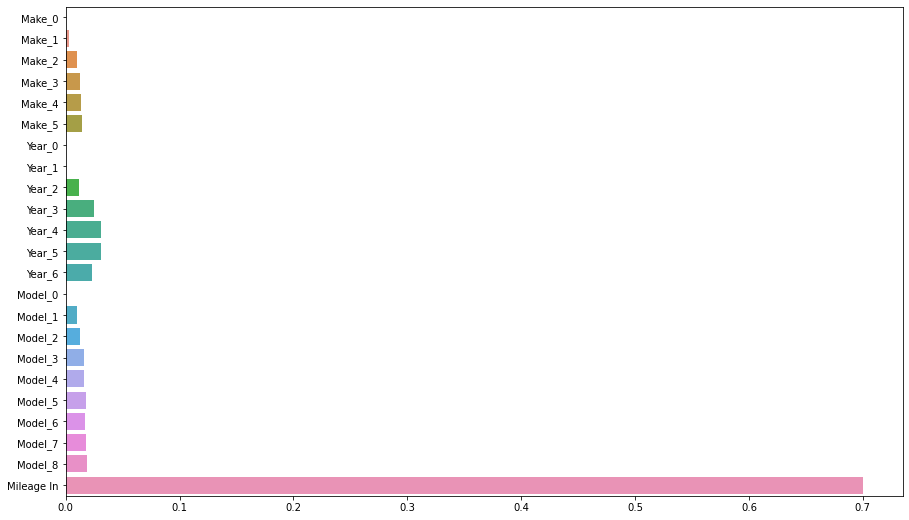

In [253]:
plt.figure(figsize=(15,9))

sns.barplot(x=rf.feature_importances_, y=X_train_encoded.columns, orient='h')